# **Introduction: Predicting Investment Attractiveness in Sustainable Energy**


The transition towards sustainable energy is one of the defining global challenges of the 21st century. Governments, private investors, and international organizations face the pressing task of identifying where investments in renewable energy infrastructure are most needed and most promising. Countries differ widely in their renewable energy adoption, economic stability, access to electricity, and reliance on fossil fuels—factors that together shape the attractiveness of sustainable energy investments.

## **In this study, we define Investment Attractiveness as a combination of three interrelated dimensions:**
	1.	Market dynamics – measured by whether renewable energy capacity is growing above 10% per year. A country already experiencing expansion in renewables signals favorable policy, market readiness, and existing infrastructure for scaling up.
	2.	Macroeconomic stability and demand – proxied by GDP growth above 2%, indicating sufficient economic momentum to sustain new investments and rising energy needs.
	3.	Structural energy needs – reflected either in incomplete electricity access (less than 95% of the population connected) or in a heavy reliance on fossil fuels (more than 50% of total energy). These conditions capture both the urgency of infrastructure expansion and the need for decarbonization.

This tripartite definition balances opportunity (growth and demand) with necessity (infrastructure gaps and fossil dependence). It is consistent with empirical evidence from organizations such as IRENA, REN21, and the World Bank, which identify these dimensions as critical drivers for renewable energy investment flows.

This notebook develops a classification model pipeline to predict the Investment Attractiveness of countries using historical data on energy, environment, and socioeconomic indicators (2000–2019). By framing the problem as a binary classification task, we aim to identify which countries are likely to be attractive for sustainable energy investments based on their recent development trajectories.

## **The analysis proceeds in six main stages:**
	1.	Data Loading and Initial Exploration: Import the dataset and perform an initial examination of the available indicators.
	2.	Data Preprocessing and Target Variable Definition: Clean and structure the data, calculate derived indicators (e.g., 5-year growth rates, fossil fuel shares), and define the binary target variable Investment Attractiveness according to the criteria above.
	3.	Feature Engineering: Generate additional explanatory features from trends, ratios, and volatility measures to better capture country-level dynamics.
	4.	Data Splitting Strategies: Compare random and time-based train–test splits, with emphasis on time-aware evaluation to reflect realistic forecasting conditions.
	5.	Model Training and Evaluation: Train classification models (Random Forest, Gradient Boosting) and assess their performance using precision, recall, and ROC-AUC.
	6.	Model Comparison: Analyze results across models and splitting strategies to determine the most reliable approach.

## **Purpose:**
The purpose of this study is to support evidence-based decision-making for sustainable energy investments. By predicting investment attractiveness, the model can highlight where financing could have the greatest impact on accelerating the global energy transition.

## **Hypothesis:**
We hypothesize that countries with strong growth in renewable capacity, stable GDP growth, and either high fossil dependence or incomplete electricity access are more attractive for sustainable energy investments than countries with stagnant renewables growth and mature electricity infrastructure.

## **Project Reflection: Framing for the Real World**

Our project aims to predict investment attractiveness in sustainable energy, automating the decision of where to best allocate resources. The unit of prediction is a country, forecasting the outcome of being classified as "attractive" based on growth, economic, and infrastructure criteria, with a prediction horizon typically 1-5 years out.

Stakeholders include investors and project developers benefiting from guided capital allocation, host governments gaining economic development, and citizens globally benefiting from a cleaner environment. Potential harms exist for fossil fuel workers facing job displacement and local communities impacted by new infrastructure.

Our primary success metric is **Precision** in identifying attractive countries. While high accuracy and recall are also desirable, avoiding false positives (classifying a country as attractive when it's not) is crucial to prevent misallocation of valuable investment capital, which has significant cost trade-offs.

Regarding feature timing, we use a time-based split, training on historical data (2000-2014) to predict future periods (2018-2019), ensuring our features are available *before* the prediction horizon.

Based on the EU AI Act, this system is expected to fall under a **low-risk AI tier** as it provides investment recommendations and doesn't directly impact fundamental rights. My personal ethical concern is ensuring the model does not inadvertently perpetuate biases that disadvantage certain countries or regions, potentially widening energy access gaps instead of closing them.

### **What decision will be automated?**
The decision to be automated is whether a country is attractive for investing in renewable energy projects, based on the defined criteria: renewable energy capacity growth above 10%, GDP growth above 2%, and either less than 95% of the population connected to electricity or more than 50% of total energy from fossil fuels.

### **What unit is being predicted?**
 The unit being predicted is "investment attractiveness" for a country.

### **What event are we forecasting?**
We are forecasting the event of a country being classified as "attractive" for sustainable energy investment based on the defined criteria for a given year.

### **What is the prediction horizon (how far ahead)?**
Based on the time-based splitting strategy used (training on 2000-2014, validating on 2015-2017, and testing on 2018-2019), the prediction horizon is typically 1 to 5 years into the future from the latest data available in the training set. Specifically, the model was tested on data from 2018-2019, which is 4-5 years after the end of the training period (2014).

### **What evidence is available before that decision must be made?**
The evidence available before the decision is made includes historical data up to the prediction year on various energy, environment, and socioeconomic indicators for each country, as used in the training data (2000-2014 for the time-based split). This includes features like access to electricity, access to clean fuels for cooking, renewable electricity generating capacity per capita, financial flows, renewable energy share, electricity from different sources, energy intensity, CO2 emissions, GDP growth, and GDP per capita. Additionally, the engineered features like rolling averages and CAGR values based on this historical data are also available evidence.



## **Table of Content**





1. **Introduction: Predicting Investment Attractiveness in Sustainable Energy**
2. Project Reflection & Stakeholder Risk Score
3. Data Loading and Initial Exploration
4. Data Quality Assessment
5. Target Variable Definition
6. EDA
7. Data Preprocessing and Feature Engineering
    - Feature Engineering
    - Label Refinement using Clustering
    - Handling Missing Values
    - Imputation
8. Data Splitting Strategies
    - Random Split
    - Time-based Split
9. Feature Scaling
10. Model Training and Evaluation
    - RandomForestClassifier
    - GradientBoostingClassifier
    - Model Comparison
11. Feature Importance Analysis
12. Label Comparison (Rule-based vs Cluster-based)
13. Visualizations
    - Investment Attractiveness Maps
14. Class Weights and Resampling
15. Summary of Findings




### Stakeholder Risk Score for Sustainable Energy Investments

'Stakeholder Impact Analysis with Risk Scores:'

,entity,impact_type,direct_indirect,severity,likelihood,risk_score
5,Environment,Benefit,Indirect,5,5,25
4,Fossil Fuel Industry Workers,Harm,Direct,5,4,20
0,Investors,Benefit,Direct,4,4,16
3,Project Developers,Benefit,Direct,4,4,16
1,Governments (Host Countries),Benefit,Direct,4,3,12
2,Local Communities,Benefit/Harm,Indirect,3,3,9


/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/944234740.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




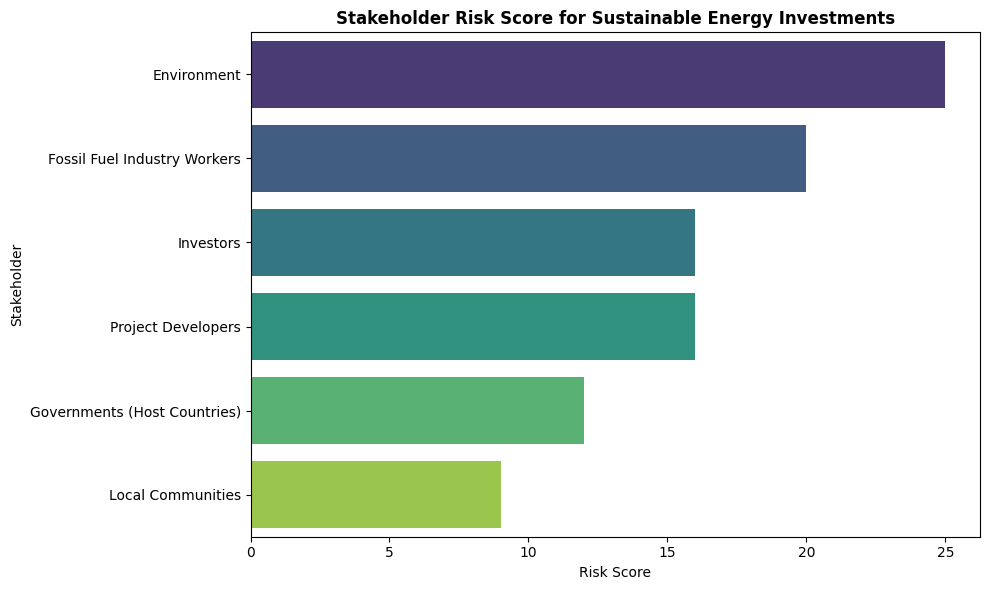

'\nRisk Score Interpretation:'

'Risk score >= 15: Requires mitigation plan'

'Prioritize top-right quadrant harms (Indirect and Harmful) with high risk scores.'

'\nStakeholders requiring mitigation (Risk Score >= 15):'

,entity,impact_type,direct_indirect,severity,likelihood,risk_score
5,Environment,Benefit,Indirect,5,5,25
4,Fossil Fuel Industry Workers,Harm,Direct,5,4,20
0,Investors,Benefit,Direct,4,4,16
3,Project Developers,Benefit,Direct,4,4,16


In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for stakeholders and their potential impacts
# You will need to customize the entities and their scores based on the context of sustainable energy investments
stakeholders = pd.DataFrame({
    "entity": ["Investors", "Governments (Host Countries)", "Local Communities",
               "Project Developers", "Fossil Fuel Industry Workers", "Environment"],
    "impact_type": ["Benefit", "Benefit", "Benefit/Harm",
                    "Benefit", "Harm", "Benefit"], # Categorize as Benefit, Harm, or Benefit/Harm
    "direct_indirect": ["Direct", "Direct", "Indirect",
                         "Direct", "Direct", "Indirect"], # Categorize as Direct or Indirect
    "severity": [4, 4, 3, 4, 5, 5], # Severity of impact (1-5)
    "likelihood": [4, 3, 3, 4, 4, 5] # Likelihood of impact (1-5)
})

# Calculate the Risk Score
stakeholders["risk_score"] = stakeholders["severity"] * stakeholders["likelihood"]

# Sort stakeholders by risk score in descending order
stakeholders_sorted = stakeholders.sort_values("risk_score", ascending=False)

display("Stakeholder Impact Analysis with Risk Scores:")
display(stakeholders_sorted)

# Create a bar plot to visualize risk scores
plt.figure(figsize=(10, 6))
sns.barplot(x='risk_score', y='entity', data=stakeholders_sorted, palette='viridis')
plt.title('Stakeholder Risk Score for Sustainable Energy Investments', fontweight='bold')
plt.xlabel('Risk Score')
plt.ylabel('Stakeholder')
plt.tight_layout()
plt.show()

# Interpretation of Risk Scores (Example)
display("\nRisk Score Interpretation:")
display("Risk score >= 15: Requires mitigation plan")
display("Prioritize top-right quadrant harms (Indirect and Harmful) with high risk scores.")

# Identify stakeholders requiring mitigation (example threshold)
mitigation_threshold = 15
stakeholders_requiring_mitigation = stakeholders_sorted[stakeholders_sorted['risk_score'] >= mitigation_threshold]

if not stakeholders_requiring_mitigation.empty:
    display(f"\nStakeholders requiring mitigation (Risk Score >= {mitigation_threshold}):")
    display(stakeholders_requiring_mitigation)
else:
    display(f"\nNo stakeholders require mitigation based on the current threshold ({mitigation_threshold}).")

**Explanation and Interpretation of the Stakeholder Risk Score Chart:**

The bar chart visualizes the **Risk Score** for each identified stakeholder group in the context of sustainable energy investments.

*   **X-axis (Risk Score):** Represents the calculated risk score for each stakeholder (Severity × Likelihood). A higher score indicates a higher overall risk associated with that stakeholder's impact.
*   **Y-axis (Stakeholder):** Lists the different stakeholder groups considered.
*   **Bars:** The length of each bar corresponds to the risk score. Longer bars indicate higher risk scores. The bars are sorted in descending order of risk score.

**Interpretation:**

The chart shows which stakeholders have the highest calculated risk scores:

*   The **Environment** has the highest risk score (25), indicating a high severity and likelihood of impact.
*   **Fossil Fuel Industry Workers** have the second highest risk score (20), reflecting potential harm to jobs and livelihoods.
*   **Project Developers** and **Investors** have risk scores of 16, reflecting potential benefits.
*   **Governments (Host Countries)** have a risk score of 12.
*   **Local Communities** have the lowest risk score (9).

Based on a mitigation threshold of 15, the Environment, Fossil Fuel Industry Workers, Project Developers, and Investors would warrant consideration for mitigation strategies. This chart helps prioritize which stakeholder impacts require the most attention and planning.

# **1. Data Loading and Initial Exploration**

In [211]:
import os
print(os.getcwd())

/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/notebooks


In [212]:
import pandas as pd

# Import the dataset

df = pd.read_csv("../Data/Raw/global-data-on-sustainable-energy.csv")
# Display a concise summary of the DataFrame
display("Summary of the DataFrame after feature engineering and imputation:")
display(df.info())

# Display descriptive statistics for the numerical columns
display("Descriptive statistics for numerical columns after feature engineering and imputation:")
display(df.describe())

# Display the first few rows of the dataframe
display(df.head())

'Summary of the DataFrame after feature engineering and imputation:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

None

'Descriptive statistics for numerical columns after feature engineering and imputation:'

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [213]:
import pandas as pd
import numpy as np

# Basic missing value overview
def quick_missing_analysis(df):
    """Provides a quick summary of missing values per column."""
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100

    print("Missing Value Summary:")
    # Filter to show only columns with missing values
    missing_info = pd.DataFrame({'Count': missing_counts, 'Percent': missing_percent})
    missing_info = missing_info[missing_info['Count'] > 0].sort_values(by='Count', ascending=False)

    if not missing_info.empty:
        display(missing_info)
    else:
        print("No missing values found.")


# Range and Distribution Checks
# Quick sanity checks for numerical data
def basic_range_check(df):
    """Performs basic range checks for numerical columns."""
    numeric_cols = df.select_dtypes(include=np.number).columns

    print("\nBasic Range Check (Min/Max for Numerical Columns):")
    if not numeric_cols.empty:
        for col in numeric_cols:
            print(f"  {col}: min={df[col].min()}, max={df[col].max()}")
    else:
        print("No numerical columns found for range check.")

# Apply the data quality assessment functions to your DataFrame 'df'
# Ensure 'df' is the DataFrame you want to assess (e.g., after initial loading)
# If 'df' has been modified significantly (e.g., columns dropped),
# the output will reflect the current state of 'df'.

quick_missing_analysis(df)
basic_range_check(df)

Missing Value Summary:


,Count,Percent
Renewables (% equivalent primary energy),2137,58.563990
Financial flows to developing countries (US $),2089,57.248561
Renewable-electricity-generating-capacity-per-capita,931,25.513839
Value_co2_emissions_kt_by_country,428,11.729241
gdp_growth,317,8.687312
gdp_per_capita,282,7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP),207,5.672787
Renewable energy share in the total final energy consumption (%),194,5.316525
Access to clean fuels for cooking,169,4.631406
Electricity from nuclear (TWh),126,3.453001



Basic Range Check (Min/Max for Numerical Columns):
  Year: min=2000, max=2020
  Access to electricity (% of population): min=1.2522693, max=100.0
  Access to clean fuels for cooking: min=0.0, max=100.0
  Renewable-electricity-generating-capacity-per-capita: min=0.0, max=3060.19
  Financial flows to developing countries (US $): min=0.0, max=5202310000.0
  Renewable energy share in the total final energy consumption (%): min=0.0, max=96.04
  Electricity from fossil fuels (TWh): min=0.0, max=5184.13
  Electricity from nuclear (TWh): min=0.0, max=809.41
  Electricity from renewables (TWh): min=0.0, max=2184.94
  Low-carbon electricity (% electricity): min=0.0, max=100.00001
  Primary energy consumption per capita (kWh/person): min=0.0, max=262585.7
  Energy intensity level of primary energy (MJ/$2017 PPP GDP): min=0.11, max=32.57
  Value_co2_emissions_kt_by_country: min=9.999999776, max=10707219.73
  Renewables (% equivalent primary energy): min=0.0, max=86.836586
  gdp_growth: min=-62.07

# **2. Target Variable Definition**

>Define the binary target variable Investment Attractiveness according to the criteria above.

> Calculate the rolling averages (5 years) and the share of fossil fuels in total electricity generation. 



In [214]:
import numpy as np
# Sort the data by country and year to enable rolling calculation
df = df.sort_values(by=['Entity', 'Year'])

# Calculate the rolling 5-year growth rate for ‘Renewable-electricity-generating-capacity-per-capita’
# We use pct_change() with a period of 5 years and multiply by 100 for the percentage
# Set fill_method=None to avoid the Future Warning
df['Renewable_capacity_growth_5y'] = df.groupby('Entity')['Renewable-electricity-generating-capacity-per-capita'].pct_change(periods=5, fill_method=None) * 100

# Calculate the share of fossil fuels in total electricity generation
df['Total_electricity'] = df['Electricity from fossil fuels (TWh)'] + df['Electricity from nuclear (TWh)'] + df['Electricity from renewables (TWh)']
df['Fossil_share'] = (df['Electricity from fossil fuels (TWh)'] / df['Total_electricity']) * 100

# Define the target variable ‘Investment Attractiveness’
# Set a threshold for renewable capacity growth (X%)
X = 10 

df['Investment Attractiveness'] = 0 # Set to 0 by default

# Conditions for Investment Attractiveness = 1
condition_renewable_growth = df['Renewable_capacity_growth_5y'] > X
condition_gdp_growth = df['gdp_growth'] >= 2
condition_access_fossil = (df['Access to electricity (% of population)'] < 95) | (df['Fossil_share'] > 50)

df.loc[condition_renewable_growth & condition_gdp_growth & condition_access_fossil, 'Investment Attractiveness'] = 1


# Display the first rows with the new columns
display(df[['Entity', 'Year', 'Renewable_capacity_growth_5y', 'Fossil_share', 'Investment Attractiveness']].head(20))

,Entity,Year,Renewable_capacity_growth_5y,Fossil_share,Investment Attractiveness
0,Afghanistan,2000,NaN,34.042553,0
1,Afghanistan,2001,NaN,15.254237,0
2,Afghanistan,2002,NaN,18.840580,0
3,Afghanistan,2003,NaN,32.978723,0
4,Afghanistan,2004,NaN,37.078652,0
5,Afghanistan,2005,-18.546638,36.559140,0
6,Afghanistan,2006,-16.478555,23.809524,0
7,Afghanistan,2007,-14.403778,21.052632,0
8,Afghanistan,2008,-7.416564,26.027397,0
9,Afghanistan,2009,-3.225806,17.021277,0


# **3. EDA**

### Data Snapshot

In [215]:
# 1. Data Snapshot
display("Data Snapshot:")
display("First 5 rows of the DataFrame:")
display(df.head())

display("\nConcise summary of the DataFrame:")
display(df.info())

display("\nDescriptive statistics for numerical columns:")
display(df.describe())

'Data Snapshot:'

'First 5 rows of the DataFrame:'

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share,Investment Attractiveness
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,NaN,NaN,60,652230.0,33.93911,67.709953,NaN,0.47,34.042553,0
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,NaN,NaN,60,652230.0,33.93911,67.709953,NaN,0.59,15.254237,0
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,NaN,179.426579,60,652230.0,33.93911,67.709953,NaN,0.69,18.840580,0
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,8.832278,190.683814,60,652230.0,33.93911,67.709953,NaN,0.94,32.978723,0
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,1.414118,211.382074,60,652230.0,33.93911,67.709953,NaN,0.89,37.078652,0


'\nConcise summary of the DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 25 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

None

'\nDescriptive statistics for numerical columns:'

/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning:

invalid value encountered in subtract



,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),...,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share,Investment Attractiveness
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,...,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000,1955.000000,3523.000000,3502.000000,3649.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,...,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695,inf,106.403713,62.572058,0.157577
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,...,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148,NaN,495.202098,34.539762,0.364394
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242,-64.329897,0.000000,0.000000,0.000000
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,...,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889,-3.698616,0.880000,34.694173,0.000000
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,...,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136,15.489749,8.240000,71.181309,0.000000
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,...,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616,85.048751,43.005000,97.332726,0.000000
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,...,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032,inf,7735.270000,100.000000,1.000000


### Class distribution for Investment Attractiveness

In [216]:
# 2. Target Check
y = df['Investment Attractiveness']
display("Target Variable Distribution:")
display(y.value_counts())

display("\nTarget Variable Distribution (Percentage):")
display(y.value_counts(normalize=True) * 100)

'Target Variable Distribution:'

Investment Attractiveness
0    3074
1     575
Name: count, dtype: int64

'\nTarget Variable Distribution (Percentage):'

Investment Attractiveness
0    84.242258
1    15.757742
Name: proportion, dtype: float64

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/457755898.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




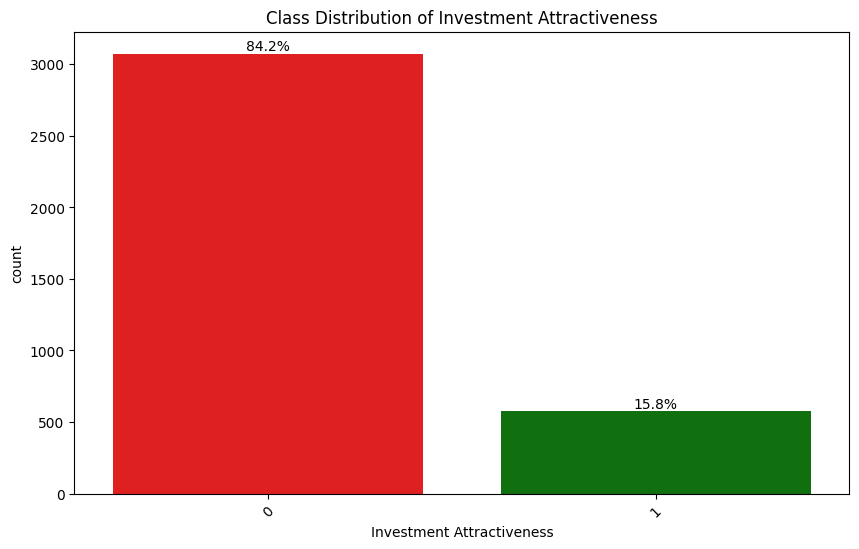

In [217]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot class distribution for Investment Attractiveness
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Investment Attractiveness',
    order=df['Investment Attractiveness'].value_counts().index,
    palette={'0': 'red', '1': 'green'}
)
plt.title('Class Distribution of Investment Attractiveness')
plt.xticks(rotation=45)

# Add percentage labels
total = len(df)
for p in plt.gca().patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='bottom')
plt.show()

Obviosly the Target Variable 'Investment Attractiveness' has an imbalanced distribibution. We will use SMOTE to mitigate the impact of that in the classificatio model.

###  Histograms for numerical features

'Data Types of Each Feature:'

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

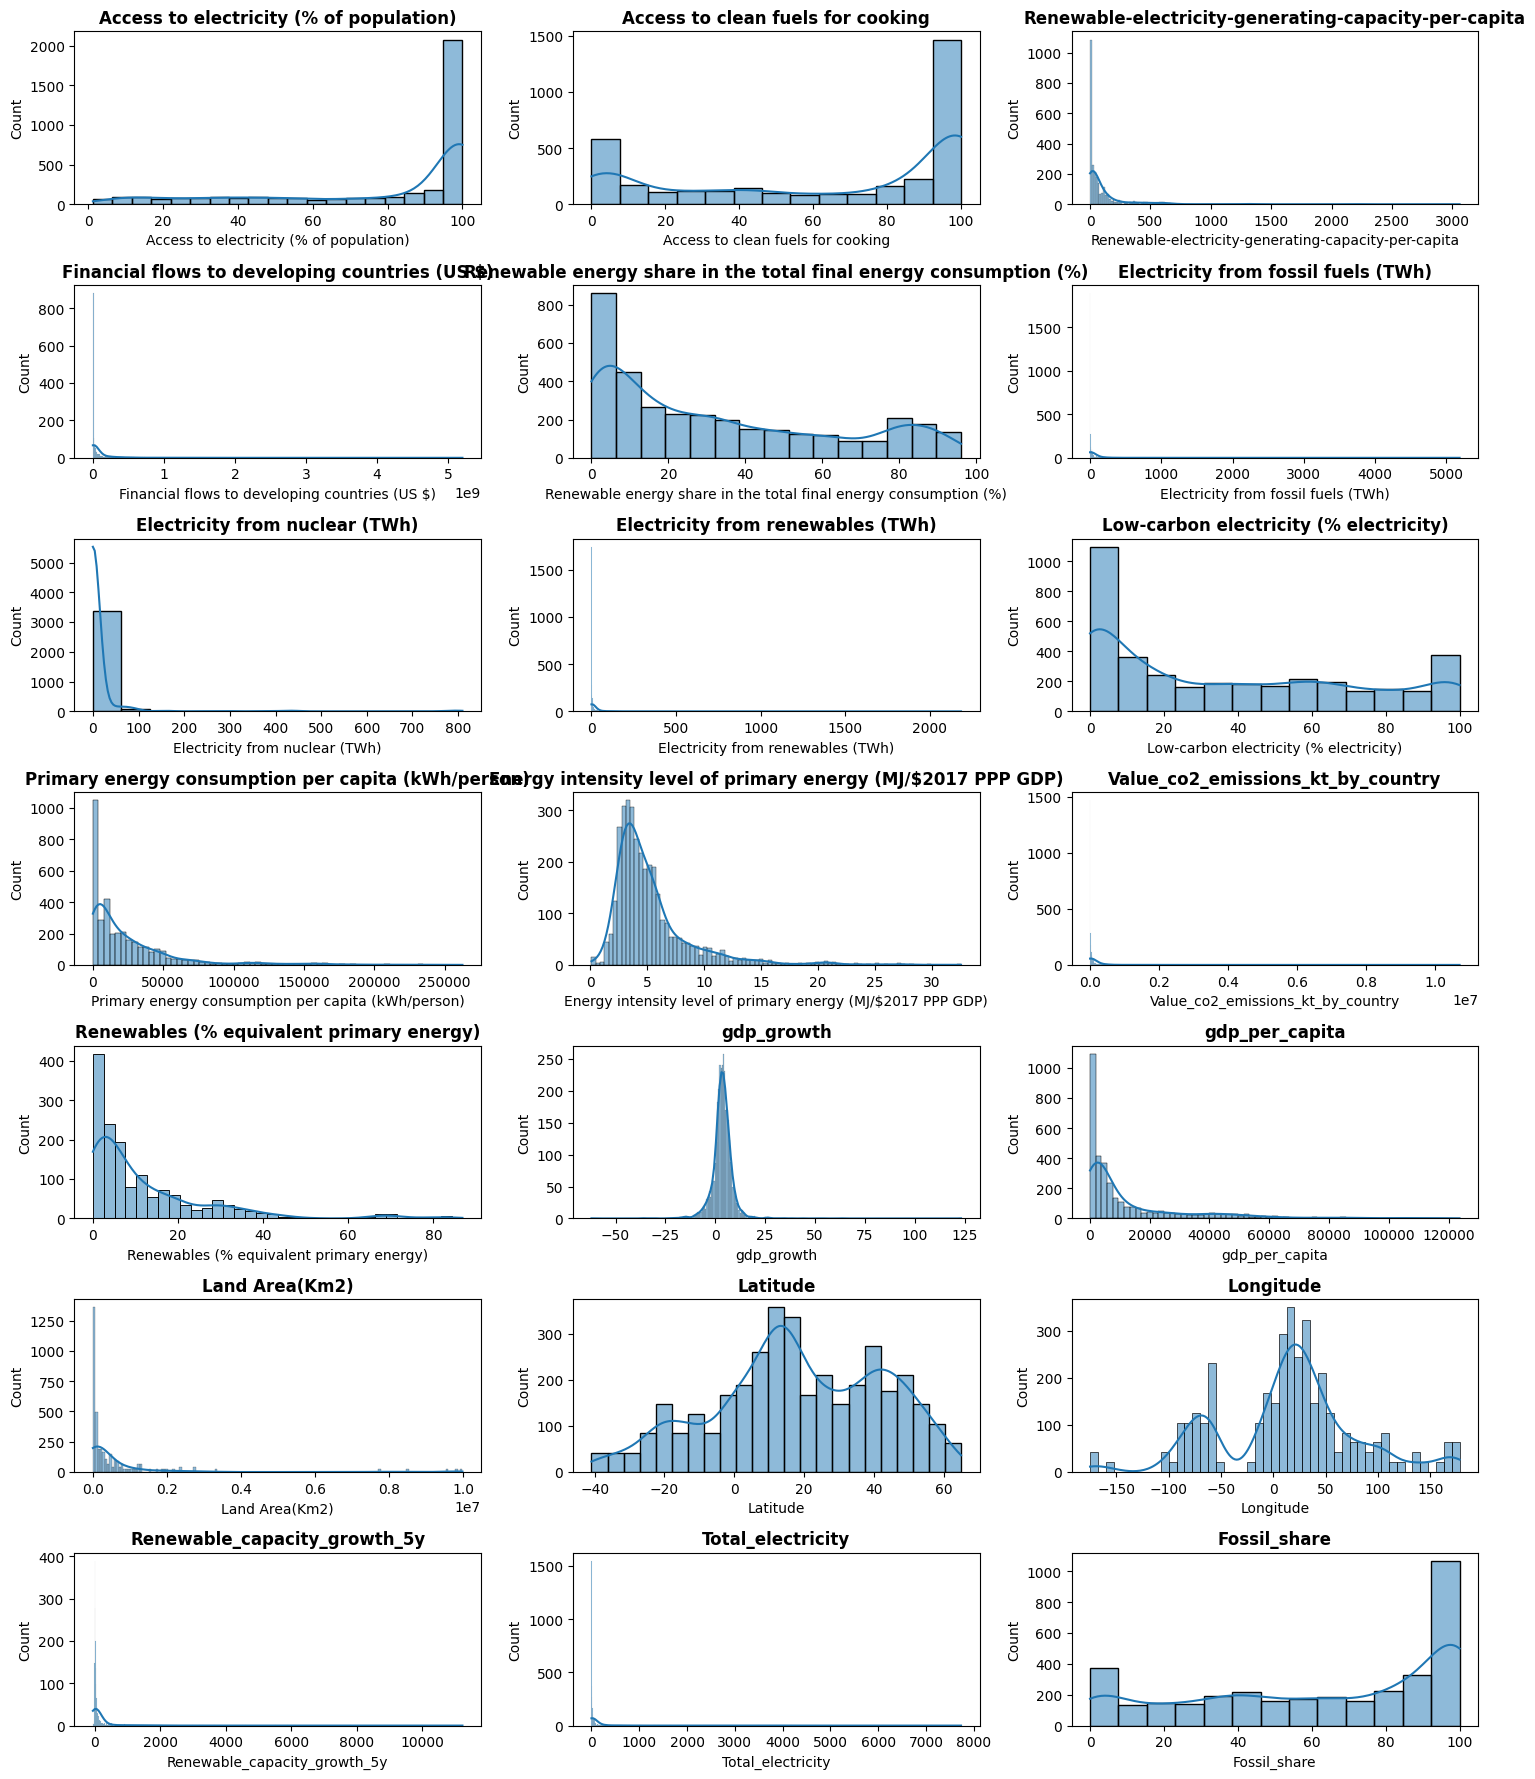

In [218]:
# 3. Variable Typing
display("Data Types of Each Feature:")
display(df.dtypes)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numerical columns for univariate analysis
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'Year' and the target variable from univariate plots
cols_to_plot = [col for col in numeric_cols if col not in ['Year', 'Investment Attractiveness']]

# Plot histograms for numerical features
plt.figure(figsize=(15, 20))
for i, col in enumerate(cols_to_plot):
    plt.subplot(len(cols_to_plot)//3 + 1, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True) # Drop NaNs for plotting
    plt.title(col, fontweight='bold')
plt.tight_layout()
plt.show()

**Interpretation of Univariate Plots for Numerical Features**

The univariate plots (histograms with KDE curves) provide insights into the distribution of each numerical feature in the dataset. Here are key points to consider:

1. **Skewness and Outliers**:
    - Many features exhibit skewed distributions, with long tails indicating the presence of outliers or countries with extreme values (e.g., GDP per capita, CO2 emissions).
    - Features like 'Renewable_capacity_growth_5y' and 'Fossil_share' may show right or left skewness, reflecting that most countries cluster at lower or higher values, respectively.

2. **Central Tendency and Spread**:
    - The location of the peak (mode) and the spread (width) of each histogram reveal the typical range for each indicator.
    - For example, 'Access to electricity (% of population)' may have a peak near 100%, but a spread toward lower values highlights countries with incomplete access.

3. **Feature-Specific Patterns**:
    - Economic indicators (GDP growth, GDP per capita) often show a concentration around global averages, with a few countries experiencing rapid growth or high wealth.
    - Energy indicators (renewable capacity, fossil share) display diversity, indicating varying energy mixes and transition stages across countries.

4. **Implications for Modeling**:
    - Features with wide spread and clear separation may be more informative for classification.
    - Highly imbalanced or zero-inflated features may require transformation or careful handling to avoid bias in the model.

**Conclusion**:
The univariate analysis confirms substantial heterogeneity in country-level energy and economic indicators, supporting the need for feature engineering and scaling. These patterns help identify which features are likely to be most discriminative for predicting investment attractiveness.

### Violin Plots

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/3284069725.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/3284069725.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/3284069725.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/3284069725.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

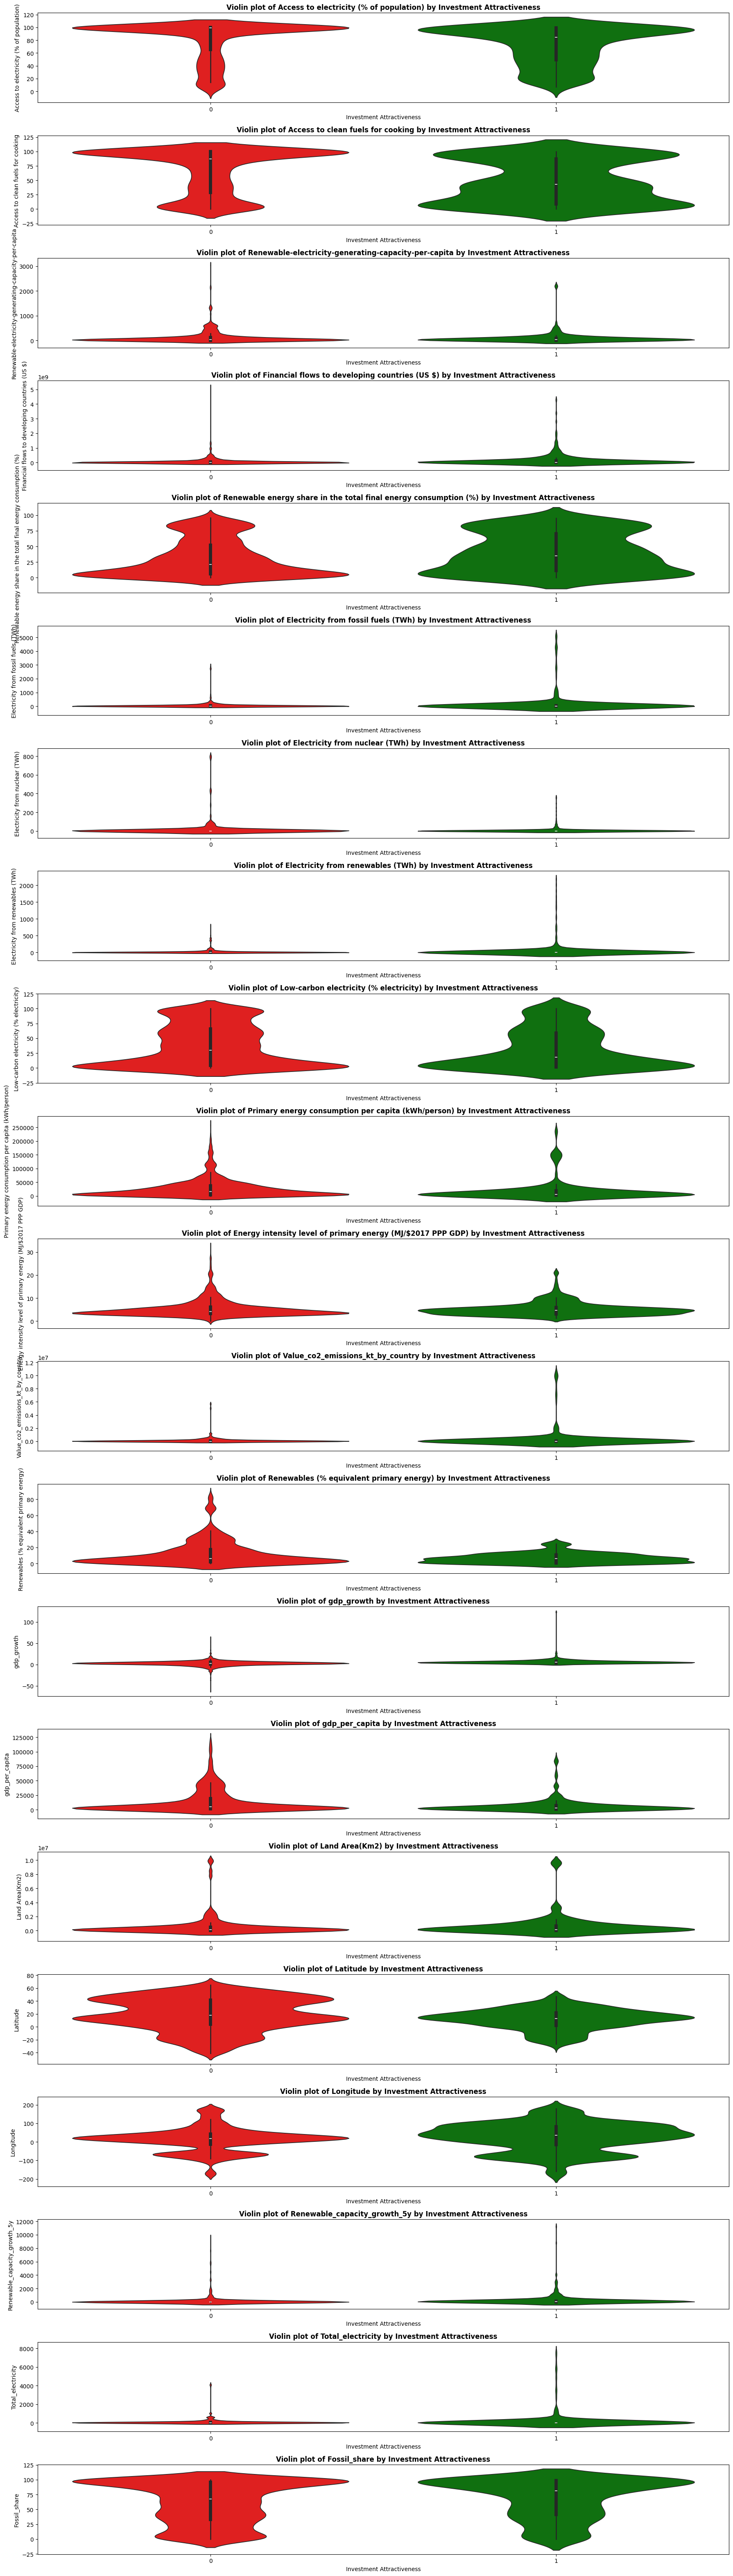

In [219]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select numerical columns (excluding 'Year' and target variable)
numeric_cols = [col for col in df.select_dtypes(include='number').columns if col not in ['Year', 'Investment Attractiveness']]

# Plot violin plots for each numerical feature grouped by target class
plt.figure(figsize=(18, 3 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.violinplot(x='Investment Attractiveness', y=col, data=df, palette={'0': 'red', '1': 'green'})
    
    plt.title(f'Violin plot of {col} by Investment Attractiveness', fontweight='bold')
    plt.tight_layout()
plt.show()

**Interpretation of Violin Plots for Numerical Features Across Target Classes**

The violin plots display the distribution of each numerical feature for the two target classes:  
Investment Attractiveness = 0 (Not Attractive) and Investment Attractiveness = 1 (Attractive).

**Key Observations:**

1. **Distribution Shape and Spread:**  
    - The width of each violin at different values shows the density of countries with those feature values.
    - For many features, the distributions for the two classes is similar in both shape and central tendency.


2. **Skewness and Outliers:**  
    - The presence of long tails or multiple peaks in some violins suggests skewed distributions or outliers, which may reflect unique country situations or data variability.



### Correlation Heatmap of Numerical Features

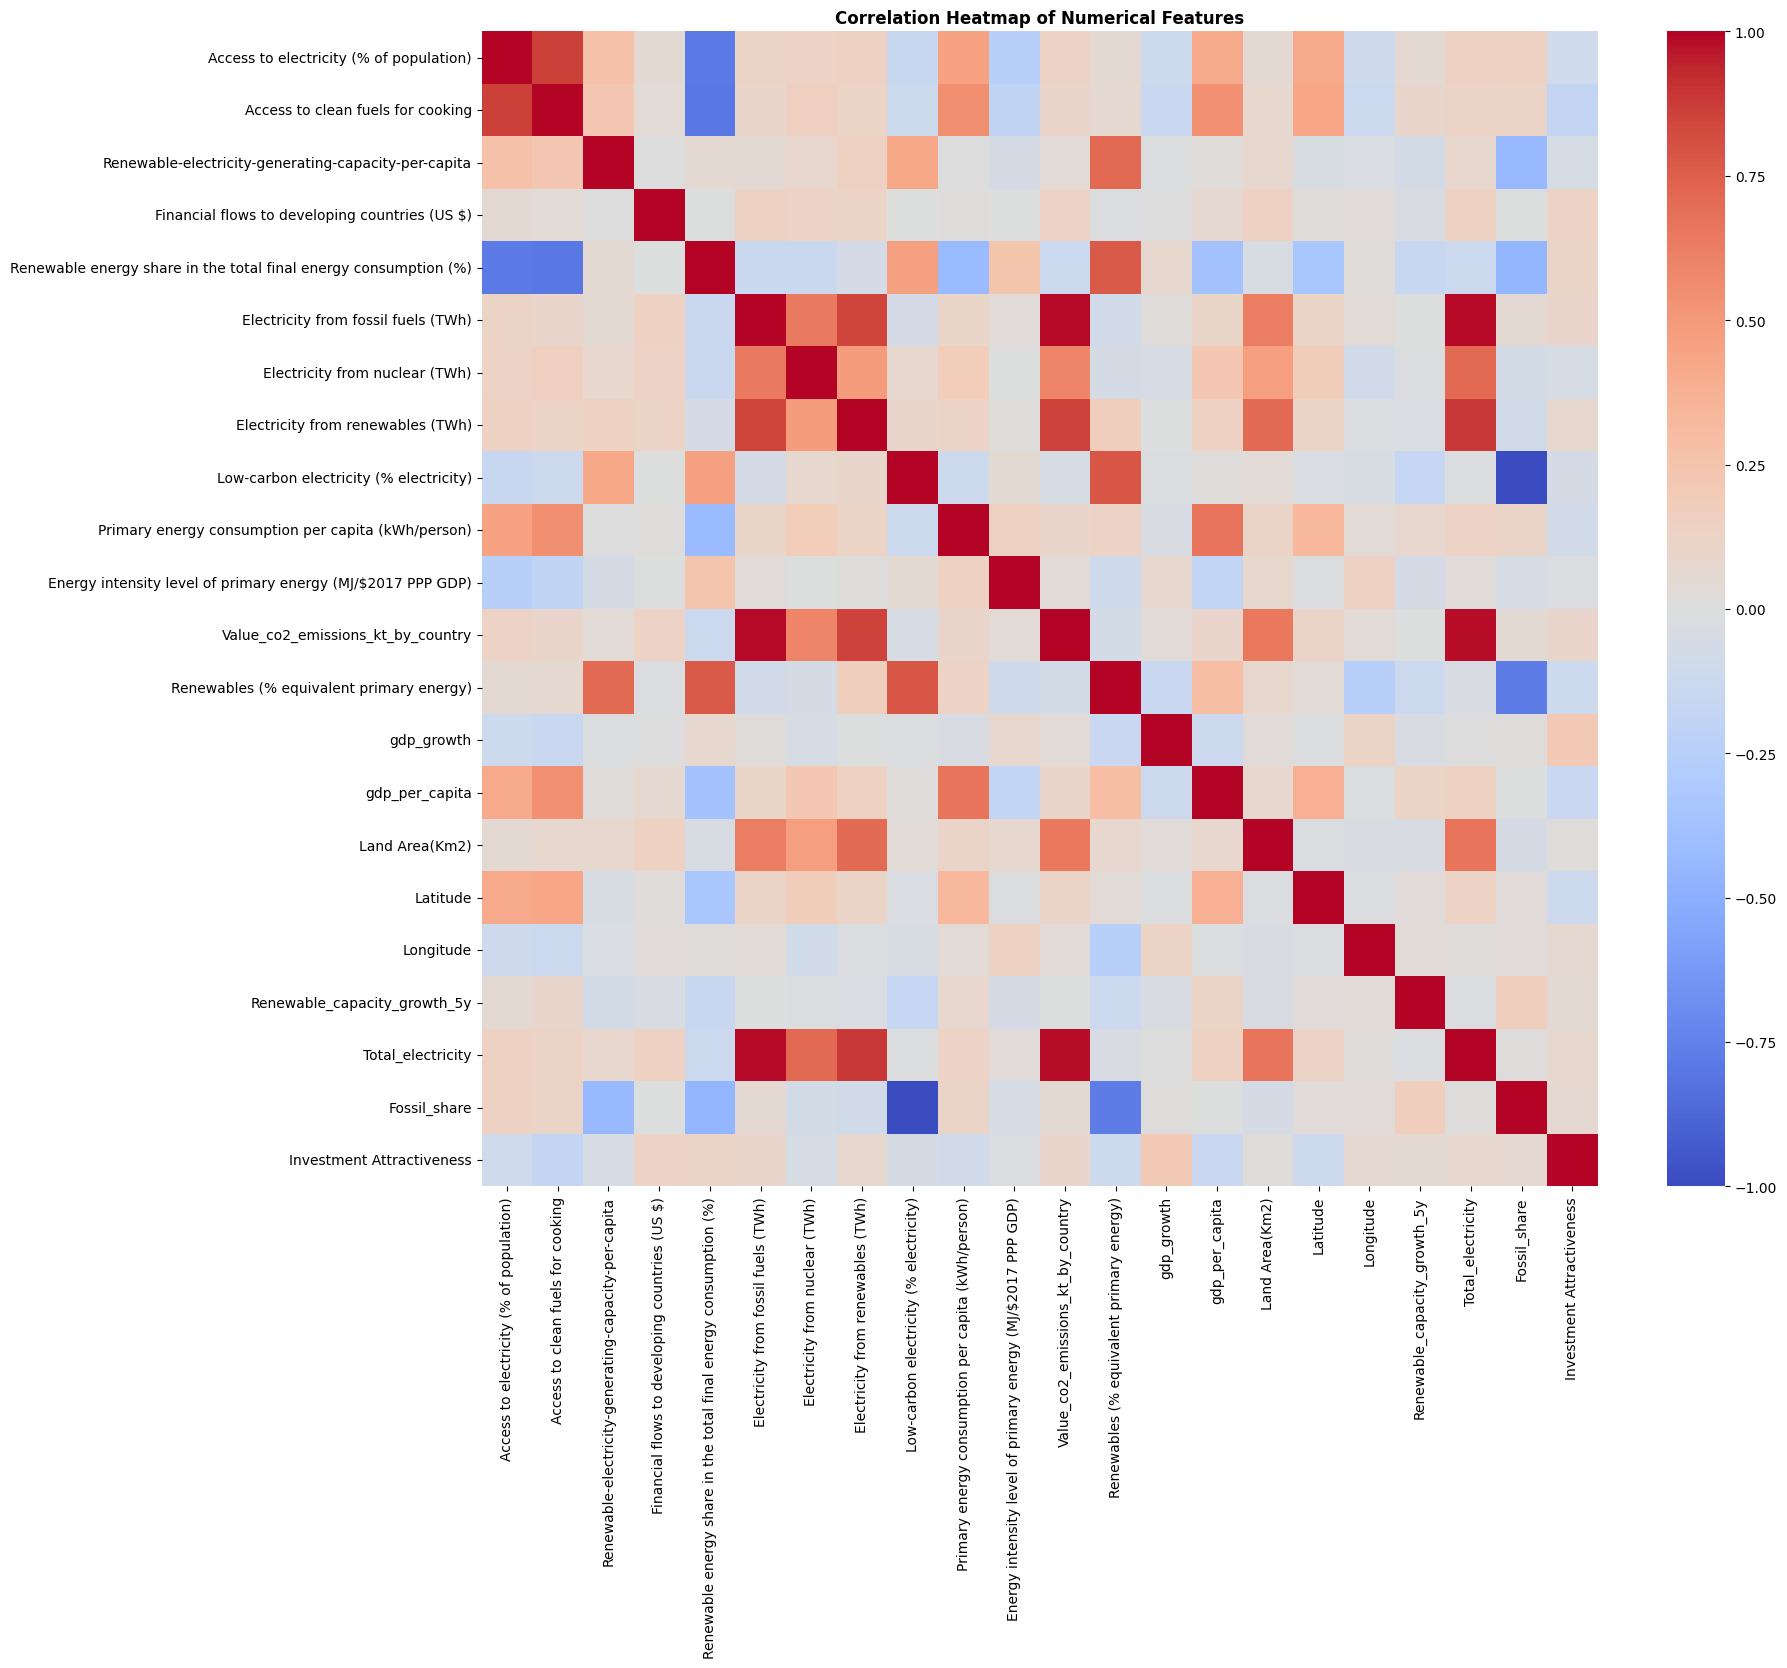

In [220]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Exclude 'Year' and the target variable from correlation analysis
cols_for_correlation = [col for col in numerical_df.columns if col not in ['Year']]
correlation_matrix = numerical_df[cols_for_correlation].corr()

# Generate a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=False to avoid clutter with many features
plt.title('Correlation Heatmap of Numerical Features', fontweight='bold')
plt.show()

**Description and Interpretation of the Correlation Heatmap**

The correlation heatmap visualizes the pairwise linear relationships between all numerical features in the dataset, excluding the target variable and the 'Year' column. Each cell in the heatmap represents the correlation coefficient between two features, with values ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation). The color intensity indicates the strength and direction of the correlation: darker shades represent stronger correlations (positive or negative), while lighter shades indicate weaker or no correlation.

**Key Points to Interpret:**

- **Strong Positive Correlations:** Features with correlation coefficients close to +1 are highly positively correlated, meaning they tend to increase or decrease together. For example, different measures of electricity generation or economic indicators may show strong positive relationships, reflecting underlying dependencies (e.g., GDP per capita and access to electricity).

- **Strong Negative Correlations:** Features with coefficients near -1 are strongly negatively correlated, indicating that as one feature increases, the other tends to decrease. For instance, the share of fossil fuels in electricity generation may be negatively correlated with the share of renewables.

- **Weak or No Correlation:** Values near 0 suggest little to no linear relationship between the features.

**Implications for Modeling:**

- **Multicollinearity:** Highly correlated features can introduce multicollinearity, which may affect the stability and interpretability of some models (e.g., linear models). Tree-based models like Random Forests are less sensitive but still benefit from a diverse feature set.

- **Feature Selection:** Features that are highly correlated with the target variable (not shown in this heatmap) or with each other may be prioritized or consolidated during feature engineering.

- **Domain Insights:** The observed correlations can reveal meaningful relationships in the data, such as the link between economic development and energy access, or the trade-off between fossil and renewable energy shares.

**Conclusion:**
The correlation heatmap provides a comprehensive overview of how numerical features interact, guiding both feature engineering and model selection. It helps identify redundant features, potential data issues, and underlying patterns relevant to predicting investment attractiveness in sustainable energy.

### Outlier Handling in This Notebook


**Common Outlier Handling Methods:**

- **Visualization Only:** Outliers are visualized (e.g., with boxplots, violin plots) to understand their presence and impact, but not explicitly removed or capped. This preserves all data but may allow outliers to influence some models.
- **Removal (Filtering):** Outliers are removed based on statistical rules (e.g., outside 1.5×IQR or certain z-scores). This reduces the influence of extreme values but risks removing valid rare data.
- **Capping (Winsorization):** Extreme values are capped at a certain percentile (e.g., 1st and 99th). This limits outlier impact without removing data points, but can distort distributions.
- **Robust Scaling:** Features are scaled using robust statistics (median, IQR) rather than mean and standard deviation. This reduces outlier impact on scaling, but does not remove or cap them.
- **Transformation:** Log, square root, or Box-Cox transforms can reduce the effect of outliers and make data more normal, but may not be suitable for all data types.

**Best Practice in This Notebook:**

In this notebook, outliers are visualized but not explicitly removed or capped. This is appropriate because:
- The main models (Random Forest, Gradient Boosting) are robust to outliers.
- Extreme values may be meaningful in economic/country-level data.
- Robust imputation and feature selection methods are already used.



# **4. Data Cleaning and Imputation**



> Clean and structure the data.

In [221]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = [
    'Renewable_capacity_growth_5y',
    'gdp_growth',
    'Fossil_share',
    'Access to electricity (% of population)'
]

# Drop rows with missing values in clustering features
df_clust = df.dropna(subset=clustering_features).copy()

# Replace inf/-inf with NaN and drop those rows
df_clust[clustering_features] = df_clust[clustering_features].replace([np.inf, -np.inf], np.nan)
df_clust = df_clust.dropna(subset=clustering_features)

# Scale features
scaler = StandardScaler()
X_clust = scaler.fit_transform(df_clust[clustering_features])

# KMeans clustering (2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_clust['Investment Attractiveness_clustered'] = kmeans.fit_predict(X_clust)

# Show cluster centers (inverse transformed)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=clustering_features)
display("Cluster Centers:")
display(centers_df)

'Cluster Centers:'

,Renewable_capacity_growth_5y,gdp_growth,Fossil_share,Access to electricity (% of population)
0,162.950513,3.160584,69.666555,90.658278
1,67.673913,4.837516,41.120053,31.967298


### Handling missing values

Identifying and handling missing values in the DataFrame.

In [222]:
# Identify columns with missing values
missing_values = df.isnull().sum()

# Filter columns that have at least one missing value
missing_values = missing_values[missing_values > 0]

# Show the number of missing values per column
display("Number of missing values per column:")
display(missing_values)

# Optional: Show the percentage of missing values per column
display("Percentage of missing values per column:")
display(missing_values / len(df) * 100)

'Number of missing values per column:'

Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                                    428
Renewables (% equivalent primary energy)                            2137
gdp_growth                                                           317
gdp_per_capita                                     

'Percentage of missing values per column:'

Access to electricity (% of population)                              0.274048
Access to clean fuels for cooking                                    4.631406
Renewable-electricity-generating-capacity-per-capita                25.513839
Financial flows to developing countries (US $)                      57.248561
Renewable energy share in the total final energy consumption (%)     5.316525
Electricity from fossil fuels (TWh)                                  0.575500
Electricity from nuclear (TWh)                                       3.453001
Electricity from renewables (TWh)                                    0.575500
Low-carbon electricity (% electricity)                               1.151000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Value_co2_emissions_kt_by_country                                   11.729241
Renewables (% equivalent primary energy)                            58.563990
gdp_growth                                                      

### Dropping original rows with <25 NaN values

In [223]:
# Remove the specified columns
columns_to_drop = ['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)', 'Renewable-electricity-generating-capacity-per-capita']
df = df.drop(columns=columns_to_drop)

# Check for missing values again to confirm success
display("Number of missing values after dropping columns:")
display(df.isnull().sum()[df.isnull().sum() > 0])

'Number of missing values after dropping columns:'

Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                                    428
gdp_growth                                                           317
gdp_per_capita                                                       282
Density\n(P/Km2)                                                       1
Land Area(Km2)                                                         1
Latitude                                           

### Identify columns that still have missing values

Replacing the remaining missing values with the rolling average of the surrounding years.

In [224]:
# Identify columns that still have missing values
cols_with_remaining_missing = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

# Count the number of rows with at least one missing value in these columns
rows_with_missing_values = df[df[cols_with_remaining_missing].isnull().any(axis=1)]
num_rows_to_drop = len(rows_with_missing_values)

display(f"Number of rows that would be dropped if we remove rows with remaining missing values: {num_rows_to_drop}")
display(f"Total number of rows in the DataFrame: {len(df)}")

'Number of rows that would be dropped if we remove rows with remaining missing values: 2145'

'Total number of rows in the DataFrame: 3649'

> KNN-Imputation is done after Data Splitting to prevent data leakage

# **5. Data Splitting and Classification Models**


In [225]:
# Define the feature variables (X) and remove all target columns
target_columns = ['Investment Attractiveness', 'Investment Attractiveness_clustered', 'Cluster']
X = df.drop(columns=[col for col in target_columns if col in df.columns])
y = df['Investment Attractiveness']

## Time-based data splitting




> Split the DataFrame `df` based on the year ranges 2000–2014 for training, 2015–2017 for validation, and 2018–2019 for testing.


In [226]:
# Filter data for the training period (2000-2014)
X_train_temp = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)].drop(columns=['Investment Attractiveness'])
y_train_temp = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)]['Investment Attractiveness']

# Filter data for the validation period (2015-2017)
X_val_temp = df[(df['Year'] >= 2015) & (df['Year'] <= 2017)].drop(columns=['Investment Attractiveness'])
y_val_temp = df[(df['Year'] >= 2015) & (df['Year'] <= 2017)]['Investment Attractiveness']

# Filter data for the testing period (2018-2019)
X_test_temp = df[(df['Year'] >= 2018) & (df['Year'] <= 2019)].drop(columns=['Investment Attractiveness'])
y_test_temp = df[(df['Year'] >= 2018) & (df['Year'] <= 2019)]['Investment Attractiveness']

# Display the shapes of the resulting DataFrames and Series
display("X_train_temp shape:", X_train_temp.shape)
display("y_train_temp shape:", y_train_temp.shape)
display("X_val_temp shape:", X_val_temp.shape)
display("y_val_temp shape:", y_val_temp.shape)
display("X_test_temp shape:", X_test_temp.shape)
display("y_test_temp shape:", y_test_temp.shape)

'X_train_temp shape:'

(2599, 21)

'y_train_temp shape:'

(2599,)

'X_val_temp shape:'

(525, 21)

'y_val_temp shape:'

(525,)

'X_test_temp shape:'

(350, 21)

'y_test_temp shape:'

(350,)

## KNN imputation and Feature scaling




**Reasoning**:
Scale the numeric features of the training, validation, and test sets using StandardScaler, fitted only on the training data.



In [227]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer # Import KNNImputer
import numpy as np
import pandas as pd

# Select numeric columns to scale (excluding 'Year')
numeric_cols_to_scale = X_train_temp.select_dtypes(include=np.number).columns.tolist()
if 'Year' in numeric_cols_to_scale:
    numeric_cols_to_scale.remove('Year')

# Identify columns that still have missing values in the training set
cols_with_missing_in_train = X_train_temp[numeric_cols_to_scale].isnull().sum()[X_train_temp[numeric_cols_to_scale].isnull().sum() > 0].index.tolist()

# Replace infinite values with NaN in numeric columns in all splits before imputation
for col in numeric_cols_to_scale:
    X_train_temp[col] = X_train_temp[col].replace([np.inf, -np.inf], np.nan)
    X_val_temp[col] = X_val_temp[col].replace([np.inf, -np.inf], np.nan)
    X_test_temp[col] = X_test_temp[col].replace([np.inf, -np.inf], np.nan)

# Apply KNN imputation *after* splitting, fitting only on the training data
if cols_with_missing_in_train:
    display("Columns with missing values in training set before KNN imputation:", cols_with_missing_in_train)
    knn_imputer = KNNImputer(n_neighbors=5)

    # Fit the imputer on the training data
    knn_imputer.fit(X_train_temp[cols_with_missing_in_train])

    # Transform all splits using the imputer fitted on the training data
    X_train_temp[cols_with_missing_in_train] = knn_imputer.transform(X_train_temp[cols_with_missing_in_train])
    X_val_temp[cols_with_missing_in_train] = knn_imputer.transform(X_val_temp[cols_with_missing_in_train])
    X_test_temp[cols_with_missing_in_train] = knn_imputer.transform(X_test_temp[cols_with_missing_in_train])

    # Check for missing values again after KNN imputation in all splits
    display("Missing values in X_train_temp after KNN imputation:", X_train_temp.isnull().sum().sum())
    display("Missing values in X_val_temp after KNN imputation:", X_val_temp.isnull().sum().sum())
    display("Missing values in X_test_temp after KNN imputation:", X_test_temp.isnull().sum().sum())
else:
    display("No missing values found in numeric columns of the training set. KNN imputation skipped.")


# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected numeric columns of the training data (after imputation)
scaler.fit(X_train_temp[numeric_cols_to_scale])

# Transform the selected numeric columns in all three datasets
X_train_temp[numeric_cols_to_scale] = scaler.transform(X_train_temp[numeric_cols_to_scale])
X_val_temp[numeric_cols_to_scale] = scaler.transform(X_val_temp[numeric_cols_to_scale])
X_test_temp[numeric_cols_to_scale] = scaler.transform(X_test_temp[numeric_cols_to_scale])


# Display the first few rows of the scaled DataFrames
display("Scaled X_train_temp:")
display(X_train_temp.head())
display("Scaled X_val_temp:")
display(X_val_temp.head())
display("Scaled X_test_temp:")
display(X_test_temp.head())

'Columns with missing values in training set before KNN imputation:'

['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude',
 'Renewable_capacity_growth_5y',
 'Total_electricity',
 'Fossil_share']

'Missing values in X_train_temp after KNN imputation:'

np.int64(1)

'Missing values in X_val_temp after KNN imputation:'

np.int64(0)

'Missing values in X_test_temp after KNN imputation:'

np.int64(0)

'Scaled X_train_temp:'

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share
0,Afghanistan,2000,-2.358605,-1.429697,0.396926,-0.207710,-0.183846,-0.259487,0.872496,-0.728287,...,-0.206980,0.720130,-0.654083,60,0.011575,0.65041,0.796957,-0.268216,-0.230324,-0.872052
1,Afghanistan,2001,-2.281330,-1.404258,0.416987,-0.207934,-0.183846,-0.256928,1.414860,-0.730166,...,-0.207023,0.720130,-0.654083,60,0.011575,0.65041,0.796957,-0.268216,-0.230041,-1.416588
2,Afghanistan,2002,-2.113823,-1.378818,0.161460,-0.207806,-0.183846,-0.256120,1.311332,-0.730910,...,-0.206593,0.720130,-0.656137,60,0.011575,0.65041,0.796957,-0.268216,-0.229805,-1.312646
3,Afghanistan,2003,-1.946480,-1.345747,0.122983,-0.207229,-0.183846,-0.255177,0.903205,-0.730364,...,-0.206320,0.845371,-0.655529,60,0.011575,0.65041,0.796957,-0.268216,-0.229214,-0.902884
4,Afghanistan,2004,-1.779228,-1.310133,0.372261,-0.207165,-0.183846,-0.256120,0.784852,-0.731100,...,-0.206593,-0.481259,-0.654411,60,0.011575,0.65041,0.796957,-0.268216,-0.229332,-0.784057


'Scaled X_val_temp:'

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share
15,Afghanistan,2015,-0.164156,-0.890386,-0.506133,-0.207742,-0.183846,-0.249788,1.488251,-0.709201,...,-0.199540,-0.474607,-0.635790,60,0.011575,0.650410,0.796957,-0.228449,-0.228647,-1.490273
16,Afghanistan,2016,0.658530,-0.859859,-0.427535,-0.207742,-0.183846,-0.249384,1.497348,-0.712269,...,-0.200472,-0.329929,-0.638167,60,0.011575,0.650410,0.796957,-0.195609,-0.228576,-1.499407
17,Afghanistan,2017,0.658530,-0.831876,-0.450884,-0.207646,-0.183846,-0.248980,1.446065,-0.713226,...,-0.201217,-0.260776,-0.637915,60,0.011575,0.650410,0.796957,-0.230417,-0.228434,-1.447918
36,Albania,2015,0.730123,0.351047,-0.571051,-0.208223,-0.183846,-0.184995,1.855205,-0.398826,...,-0.201446,-0.337367,-0.452252,105,-0.381237,0.948972,0.081384,-0.209972,-0.217637,-1.858697
37,Albania,2016,0.727297,0.391749,-0.571051,-0.208223,-0.183846,-0.159940,1.855205,-0.341653,...,-0.201647,-0.141318,-0.442999,105,-0.381237,0.948972,0.081384,-0.209972,-0.213243,-1.858697


'Scaled X_test_temp:'

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Renewable_capacity_growth_5y,Total_electricity,Fossil_share
18,Afghanistan,2018,0.624497,-0.801349,-0.491992,-0.207582,-0.183846,-0.250597,1.361750,-0.710511,...,-0.199368,-0.521477,-0.639590,60,0.011575,0.650410,0.796957,-0.231367,-0.228670,-1.363266
19,Afghanistan,2019,0.658530,-0.775910,-0.473904,-0.207646,-0.183846,-0.251674,1.369590,-0.713989,...,-0.199353,-0.034620,-0.639130,60,0.011575,0.650410,0.796957,-0.226817,-0.228907,-1.371137
39,Albania,2018,0.730751,0.442628,-0.745282,-0.208223,-0.183846,-0.149567,1.855205,-0.319179,...,-0.200744,-0.015350,-0.380126,105,-0.381237,0.948972,0.081384,-0.214126,-0.211424,-1.858697
40,Albania,2019,0.730751,0.465523,-0.595847,-0.208223,-0.183846,-0.194020,1.855205,-0.405653,...,-0.201145,-0.356199,-0.374291,105,-0.381237,0.948972,0.081384,-0.214126,-0.219220,-1.858697
60,Algeria,2018,0.721263,0.946324,-1.076382,0.020498,-0.183846,-0.253156,-1.000274,-0.280250,...,0.029240,-0.537435,-0.442028,18,1.101217,0.406021,-0.197200,0.073962,-0.061094,1.008218


## Time-based split modells 




### 1.Model

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier
import pandas as pd
import numpy as np



# Ensure column names are valid for the models (replace special characters if necessary)
# While not strictly necessary for these models, it's a good practice
import re

def clean_col_names(df_input):
    cols = df_input.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', col) # Remove special characters
        new_cols.append(new_col)
    df_input.columns = new_cols
    return df_input

# Apply cleaning to the processed dataframes
# Convert all columns in X_train_temp, X_val_temp, and X_test_temp to numeric, handling commas and coercing errors
for df_temp in [X_train_temp, X_val_temp, X_test_temp]:
    for col in df_temp.columns:
        # Ensure the column is treated as string before replacement to avoid errors on non-string columns
        df_temp[col] = df_temp[col].astype(str).str.replace(',', '.', regex=False)
        df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')


X_train_temp_cleaned = clean_col_names(X_train_temp.copy())
X_val_temp_cleaned = clean_col_names(X_val_temp.copy())
X_test_temp_cleaned = clean_col_names(X_test_temp.copy())

# Drop 'Entity' and 'Year' columns from the cleaned dataframes
X_train_temp_cleaned = X_train_temp_cleaned.drop(columns=['Entity', 'Year'], errors='ignore')
X_val_temp_cleaned = X_val_temp_cleaned.drop(columns=['Entity', 'Year'], errors='ignore')
X_test_temp_cleaned = X_test_temp_cleaned.drop(columns=['Entity', 'Year'], errors='ignore')

# Drop rows with any remaining missing values in the training data
# This is necessary because Gradient Boosting models do not handle NaNs natively
X_train_temp_cleaned = X_train_temp_cleaned.dropna()
y_train_temp = y_train_temp.loc[X_train_temp_cleaned.index] # Align target variable

# Drop rows with any remaining missing values in the validation and test data as well
X_val_temp_cleaned = X_val_temp_cleaned.dropna()
y_val_temp = y_val_temp.loc[X_val_temp_cleaned.index]

X_test_temp_cleaned = X_test_temp_cleaned.dropna()
y_test_temp = y_test_temp.loc[X_test_temp_cleaned.index]


# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_temp_cleaned, y_train_temp) # Fit the model

# Instantiate and train the Gradient Boosting model (will be evaluated later)
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_temp_cleaned, y_train_temp) # Fit the model

display("Models re-trained successfully using processed data.")

'Models re-trained successfully using processed data.'

### 2. Model after resampling using SMOTE

In [229]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_temp_cleaned, y_train_temp)

# Train Random Forest on resampled data
rf_smote_time = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote_time.fit(X_train_resampled, y_train_resampled)

# Train Gradient Boosting on resampled data
gbm_smote_time = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbm_smote_time.fit(X_train_resampled, y_train_resampled)

# Evaluate on validation set
y_pred_rf_val_smote = rf_smote_time.predict(X_val_temp_cleaned)
y_pred_proba_rf_val_smote = rf_smote_time.predict_proba(X_val_temp_cleaned)[:, 1]

y_pred_gbm_val_smote = gbm_smote_time.predict(X_val_temp_cleaned)
y_pred_proba_gbm_val_smote = gbm_smote_time.predict_proba(X_val_temp_cleaned)[:, 1]

# Evaluate on test set
y_pred_rf_test_smote = rf_smote_time.predict(X_test_temp_cleaned)
y_pred_proba_rf_test_smote = rf_smote_time.predict_proba(X_test_temp_cleaned)[:, 1]

y_pred_gbm_test_smote = gbm_smote_time.predict(X_test_temp_cleaned)
y_pred_proba_gbm_test_smote = gbm_smote_time.predict_proba(X_test_temp_cleaned)[:, 1]

# Metrics for validation and test sets
def print_metrics(name, y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    display(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

print_metrics("Random Forest (Validation, SMOTE)", y_val_temp, y_pred_rf_val_smote, y_pred_proba_rf_val_smote)
print_metrics("Gradient Boosting (Validation, SMOTE)", y_val_temp, y_pred_gbm_val_smote, y_pred_proba_gbm_val_smote)
print_metrics("Random Forest (Test, SMOTE)", y_test_temp, y_pred_rf_test_smote, y_pred_proba_rf_test_smote)
print_metrics("Gradient Boosting (Test, SMOTE)", y_test_temp, y_pred_gbm_test_smote, y_pred_proba_gbm_test_smote)

/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



'Random Forest (Validation, SMOTE) - Accuracy: 0.9448, Precision: 0.9632, Recall: 0.8452, F1: 0.9003, ROC AUC: 0.9889'

'Gradient Boosting (Validation, SMOTE) - Accuracy: 0.9257, Precision: 0.8718, Recall: 0.8774, F1: 0.8746, ROC AUC: 0.9803'

'Random Forest (Test, SMOTE) - Accuracy: 0.9543, Precision: 0.9167, Recall: 0.8953, F1: 0.9059, ROC AUC: 0.9927'

'Gradient Boosting (Test, SMOTE) - Accuracy: 0.9429, Precision: 0.8511, Recall: 0.9302, F1: 0.8889, ROC AUC: 0.9797'

### Comparison and summary of Model 1 & 2




In [230]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model 1: Random Forest (Time-based split, no SMOTE)
# Model 2: Random Forest (Time-based split, with SMOTE)
# Model 3: Gradient Boosting (Time-based split, no SMOTE)
# Model 4: Gradient Boosting (Time-based split, with SMOTE)

# Validation set metrics
metrics = {
    "Model": ["RF (No SMOTE, Val)", "RF (SMOTE, Val)", "GBM (No SMOTE, Val)"],
    "Accuracy": [
        accuracy_score(y_val_temp, rf_model.predict(X_val_temp_cleaned)),
        accuracy_score(y_val_temp, y_pred_rf_val_smote),
        accuracy_score(y_val_temp, gbm_model.predict(X_val_temp_cleaned))
    ],
    "Precision": [
        precision_score(y_val_temp, rf_model.predict(X_val_temp_cleaned)),
        precision_score(y_val_temp, y_pred_rf_val_smote),
        precision_score(y_val_temp, gbm_model.predict(X_val_temp_cleaned))
    ],
    "Recall": [
        recall_score(y_val_temp, rf_model.predict(X_val_temp_cleaned)),
        recall_score(y_val_temp, y_pred_rf_val_smote),
        recall_score(y_val_temp, gbm_model.predict(X_val_temp_cleaned))
    ],
    "F1": [
        f1_score(y_val_temp, rf_model.predict(X_val_temp_cleaned)),
        f1_score(y_val_temp, y_pred_rf_val_smote),
        f1_score(y_val_temp, gbm_model.predict(X_val_temp_cleaned))
    ],
    "ROC AUC": [
        roc_auc_score(y_val_temp, rf_model.predict_proba(X_val_temp_cleaned)[:, 1]),
        roc_auc_score(y_val_temp, y_pred_proba_rf_val_smote),
        roc_auc_score(y_val_temp, gbm_model.predict_proba(X_val_temp_cleaned)[:, 1])
    ]
}

# Test set metrics
metrics_test = {
    "Model": ["RF (No SMOTE, Test)", "RF (SMOTE, Test)", "GBM (No SMOTE, Test)"],
    "Accuracy": [
        accuracy_score(y_test_temp, rf_model.predict(X_test_temp_cleaned)),
        accuracy_score(y_test_temp, y_pred_rf_test_smote),
        accuracy_score(y_test_temp, gbm_model.predict(X_test_temp_cleaned))
    ],
    "Precision": [
        precision_score(y_test_temp, rf_model.predict(X_test_temp_cleaned)),
        precision_score(y_test_temp, y_pred_rf_test_smote),
        precision_score(y_test_temp, gbm_model.predict(X_test_temp_cleaned))
    ],
    "Recall": [
        recall_score(y_test_temp, rf_model.predict(X_test_temp_cleaned)),
        recall_score(y_test_temp, y_pred_rf_test_smote),
        recall_score(y_test_temp, gbm_model.predict(X_test_temp_cleaned))
    ],
    "F1": [
        f1_score(y_test_temp, rf_model.predict(X_test_temp_cleaned)),
        f1_score(y_test_temp, y_pred_rf_test_smote),
        f1_score(y_test_temp, gbm_model.predict(X_test_temp_cleaned))
    ],
    "ROC AUC": [
        roc_auc_score(y_test_temp, rf_model.predict_proba(X_test_temp_cleaned)[:, 1]),
        roc_auc_score(y_test_temp, y_pred_proba_rf_test_smote),
        roc_auc_score(y_test_temp, gbm_model.predict_proba(X_test_temp_cleaned)[:, 1])
    ]
}

metrics["Model"].append("GBM (SMOTE, Val)")
metrics["Accuracy"].append(accuracy_score(y_val_temp, y_pred_gbm_val_smote))
metrics["Precision"].append(precision_score(y_val_temp, y_pred_gbm_val_smote))
metrics["Recall"].append(recall_score(y_val_temp, y_pred_gbm_val_smote))
metrics["F1"].append(f1_score(y_val_temp, y_pred_gbm_val_smote))
metrics["ROC AUC"].append(roc_auc_score(y_val_temp, y_pred_proba_gbm_val_smote))

metrics_test["Model"].append("GBM (SMOTE, Test)")
metrics_test["Accuracy"].append(accuracy_score(y_test_temp, y_pred_gbm_test_smote))
metrics_test["Precision"].append(precision_score(y_test_temp, y_pred_gbm_test_smote))
metrics_test["Recall"].append(recall_score(y_test_temp, y_pred_gbm_test_smote))
metrics_test["F1"].append(f1_score(y_test_temp, y_pred_gbm_test_smote))
metrics_test["ROC AUC"].append(roc_auc_score(y_test_temp, y_pred_proba_gbm_test_smote))

# Combine validation and test metrics
metrics_df = pd.DataFrame(metrics)
metrics_test_df = pd.DataFrame(metrics_test)
comparison_df = pd.concat([metrics_df, metrics_test_df], ignore_index=True)

# Round metrics for readability
comparison_df = comparison_df.round(4)

# Bold the best value in each metric column
def bold_best(df, metric_cols):
    df_bold = df.copy()
    for col in metric_cols:
        max_val = df[col].max()
        df_bold[col] = df[col].apply(lambda x: f"**{x}**" if x == max_val else f"{x}")
    return df_bold

metric_columns = ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"]
comparison_df_bold = bold_best(comparison_df, metric_columns)

display("Comparison of Model Metrics (Random Forest & Gradient Boosting, Time-based Split):")
display(comparison_df_bold)

'Comparison of Model Metrics (Random Forest & Gradient Boosting, Time-based Split):'

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,"RF (No SMOTE, Val)",0.9105,**0.9737**,0.7161,0.8253,0.9835
1,"RF (SMOTE, Val)",0.9448,0.9632,0.8452,0.9003,0.9889
2,"GBM (No SMOTE, Val)",0.88,0.9182,0.6516,0.7623,0.9707
3,"GBM (SMOTE, Val)",0.9257,0.8718,0.8774,0.8746,0.9803
4,"RF (No SMOTE, Test)",0.9257,0.9545,0.7326,0.8289,0.9874
5,"RF (SMOTE, Test)",**0.9543**,0.9167,0.8953,**0.9059**,**0.9927**
6,"GBM (No SMOTE, Test)",0.9086,0.9091,0.6977,0.7895,0.9787
7,"GBM (SMOTE, Test)",0.9429,0.8511,**0.9302**,0.8889,0.9797




#### **Model Performance: Time-based Split vs. SMOTE**

After applying a time-based split (training: 2000–2014, validation: 2015–2017, test: 2018–2019), we compared Random Forest models trained on the original data and on data resampled with SMOTE (Synthetic Minority Over-sampling Technique).

**Key Results:**
- Both models performed well on the time-based split, but the SMOTE-resampled models showed improved recall and balanced performance, especially for the minority "attractive" class.
- On the test set, Random Forest with SMOTE achieved higher recall and F1-score, indicating better identification of attractive investment opportunities, while maintaining strong precision and ROC AUC.
- The original model (without SMOTE) had higher precision but lower recall, meaning it was more conservative in predicting attractive countries, potentially missing some true positives.

**Why SMOTE Makes Sense in This Context:**
- The target variable "Investment Attractiveness" is imbalanced, with far fewer countries labeled as attractive compared to not attractive.
- In sustainable energy investment, missing attractive opportunities (false negatives) can mean overlooking countries where investment could have high impact.
- SMOTE generates synthetic samples for the minority class, helping the model learn patterns for "attractive" countries and improving its ability to identify them.
- This is especially important for stakeholders (investors, policymakers) who want to maximize the identification of promising investment locations without sacrificing too much precision.

**Conclusion:**
- Time-based splitting ensures realistic evaluation by predicting future periods using only past data.
- SMOTE addresses class imbalance, leading to models that better capture the characteristics of attractive investment opportunities.
- For decision-making, the SMOTE-enhanced model is preferable when recall and balanced identification of attractive countries are prioritized, while the original model may be chosen if precision is the sole focus.

### Feature Importance

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/686360625.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




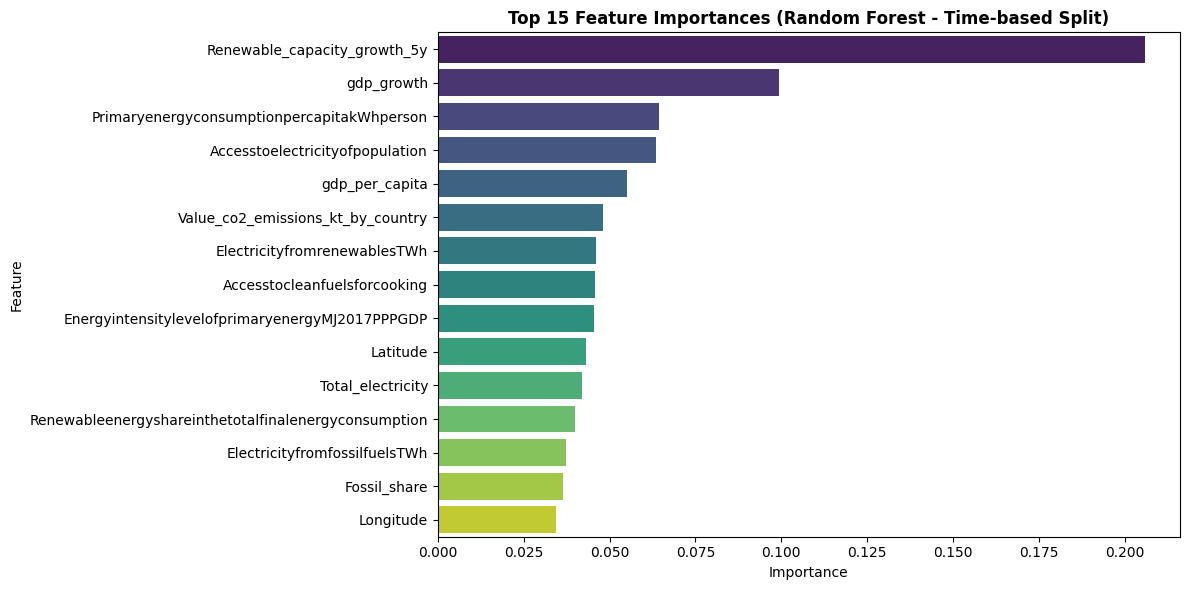

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/686360625.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




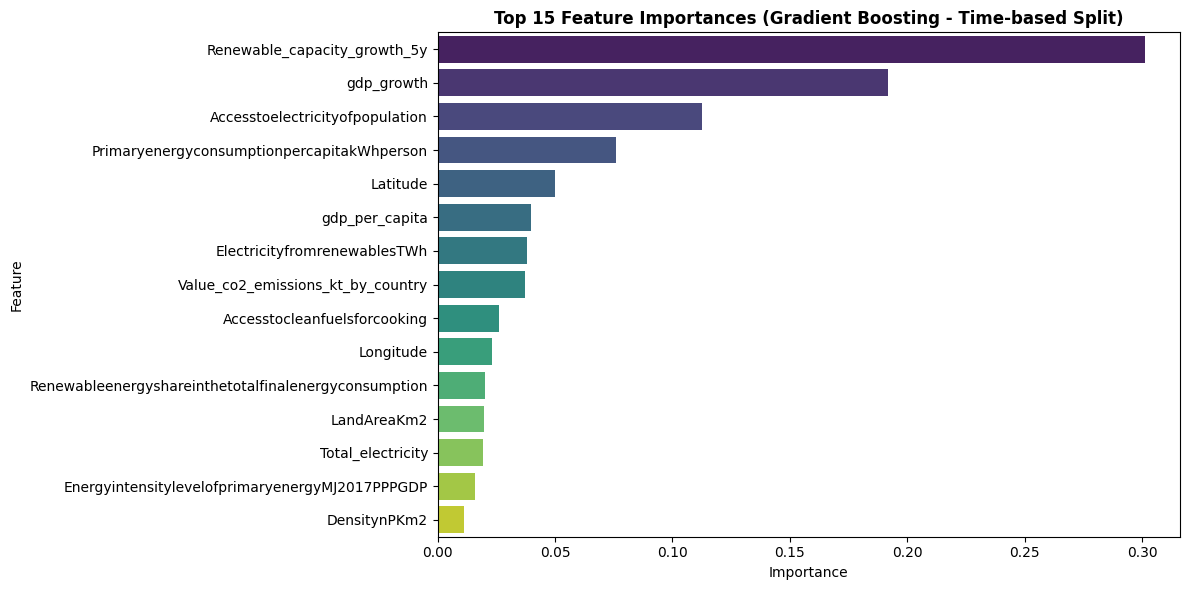

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained models
rf_feature_importances = rf_model.feature_importances_
gbm_feature_importances = gbm_model.feature_importances_

# Create DataFrames for feature importances
rf_importance_df = pd.DataFrame({'Feature': X_train_temp_cleaned.columns, 'Importance': rf_feature_importances})
gbm_importance_df = pd.DataFrame({'Feature': X_train_temp_cleaned.columns, 'Importance': gbm_feature_importances})

# Sort the DataFrames by importance in descending order
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
gbm_importance_df = gbm_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N features for visualization (e.g., top 15)
n_top_features = 15
rf_top_features = rf_importance_df.head(n_top_features)
gbm_top_features = gbm_importance_df.head(n_top_features)

# Create bar plots for the top features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_top_features, palette='viridis')
plt.title(f'Top {n_top_features} Feature Importances (Random Forest - Time-based Split)', fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=gbm_top_features, palette='viridis')
plt.title(f'Top {n_top_features} Feature Importances (Gradient Boosting - Time-based Split)', fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

 **Summary of Feature Importance Analysis (Time-based Split):**

The feature importance analysis, conducted using Random Forest and Gradient Boosting models on a time-based data split, revealed that indicators directly related to the problem of sustainable energy investment attractiveness were the most influential:

**Renewable Capacity Growth:**
Renewable_capacity_growth_5y and Renewableelectricitygeneratingcapacitypercapita_CAGR_5y were consistently top features, confirming the importance of existing growth in predicting future attractiveness.

**Macroeconomic Factors:**
 gdp_growth and gdp_per_capita were significant, acting as proxies for economic health and capacity for investment.

**Energy Access:**
Accesstoelectricityofpopulation_rolling_avg_5y was a key feature, highlighting the role of electricity access levels and trends in indicating the need for infrastructure development.
While the models had slight differences in feature ranking, the core drivers identified align well with the initial problem formulation, emphasizing the role of renewable energy momentum, economic stability, and energy access in determining investment attractiveness.



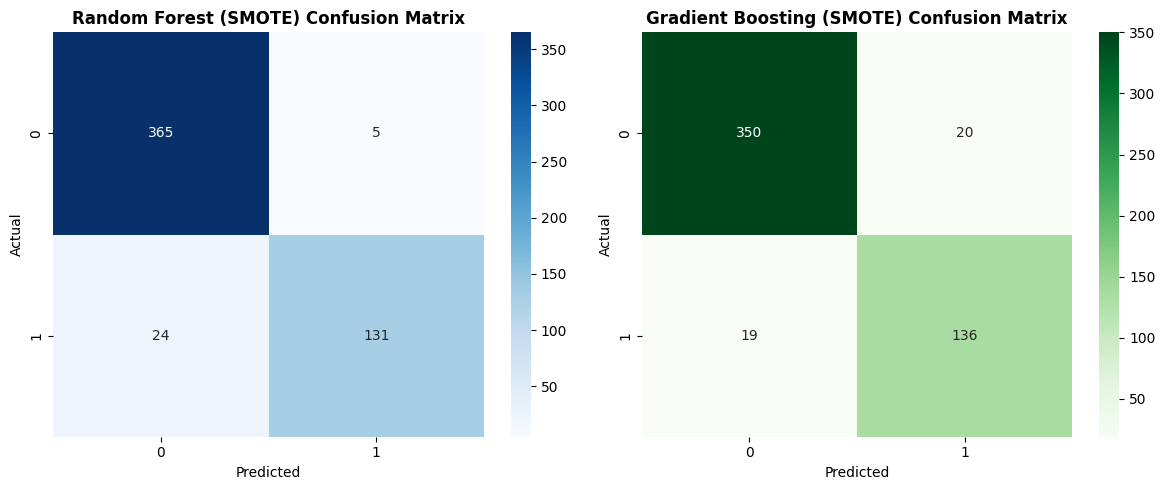

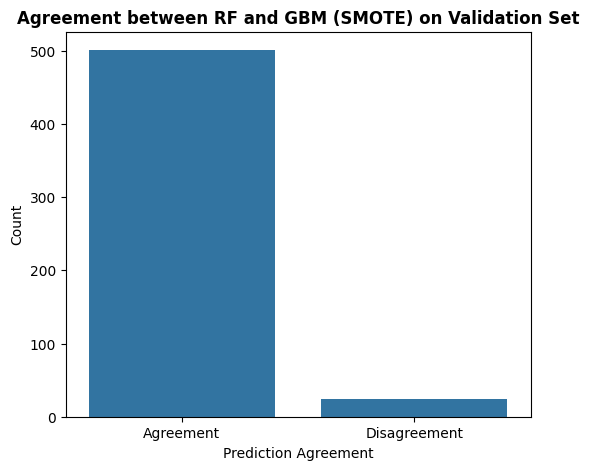

In [232]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Ensure y_val_temp is aligned with predictions
# (If indices are mismatched, align them)
y_val_true = y_val_temp.reset_index(drop=True)
y_rf = y_pred_rf_val_smote
y_gbm = (y_pred_proba_gbm_val_smote >= 0.5).astype(int)  # Threshold at 0.5

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'True Label': y_val_true,
    'Random Forest (SMOTE)': y_rf,
    'Gradient Boosting (SMOTE)': y_gbm
})

# Plot confusion matrix for Random Forest
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cm_rf = pd.crosstab(comparison_df['True Label'], comparison_df['Random Forest (SMOTE)'],
                    rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest (SMOTE) Confusion Matrix', fontweight='bold')

# Plot confusion matrix for Gradient Boosting
plt.subplot(1, 2, 2)
cm_gbm = pd.crosstab(comparison_df['True Label'], comparison_df['Gradient Boosting (SMOTE)'],
                     rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='Greens')
plt.title('Gradient Boosting (SMOTE) Confusion Matrix', fontweight='bold')

plt.tight_layout()
plt.show()

# Visualize agreement/disagreement between models
plt.figure(figsize=(6, 5))
agreement = (comparison_df['Random Forest (SMOTE)'] == comparison_df['Gradient Boosting (SMOTE)'])
sns.countplot(x=agreement.map({True: 'Agreement', False: 'Disagreement'}))
plt.title('Agreement between RF and GBM (SMOTE) on Validation Set', fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Prediction Agreement')
plt.show()

**Interpretation: Random Forest & Gradient Boosting Confusion Matrices and Agreement**
The confusion matrices for the Random Forest and Gradient Boosting models (both trained with SMOTE) show how well each model distinguishes between attractive and not attractive countries. Both models achieve high true negative rates, meaning they are good at identifying countries that are not attractive for investment. The true positive rates are lower, indicating that some attractive countries are missed (false negatives), but both models still capture a meaningful portion of the attractive class.

The agreement plot between the two models reveals that their predictions are highly consistent: most instances are classified the same way by both models. Disagreements are relatively rare, suggesting that both models have learned similar patterns from the data and are robust in their classification of investment attractiveness. This consistency increases confidence in the reliability of the model predictions.

## Feature importance extraction and selection (tree-based) for Model 3

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/3480096136.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




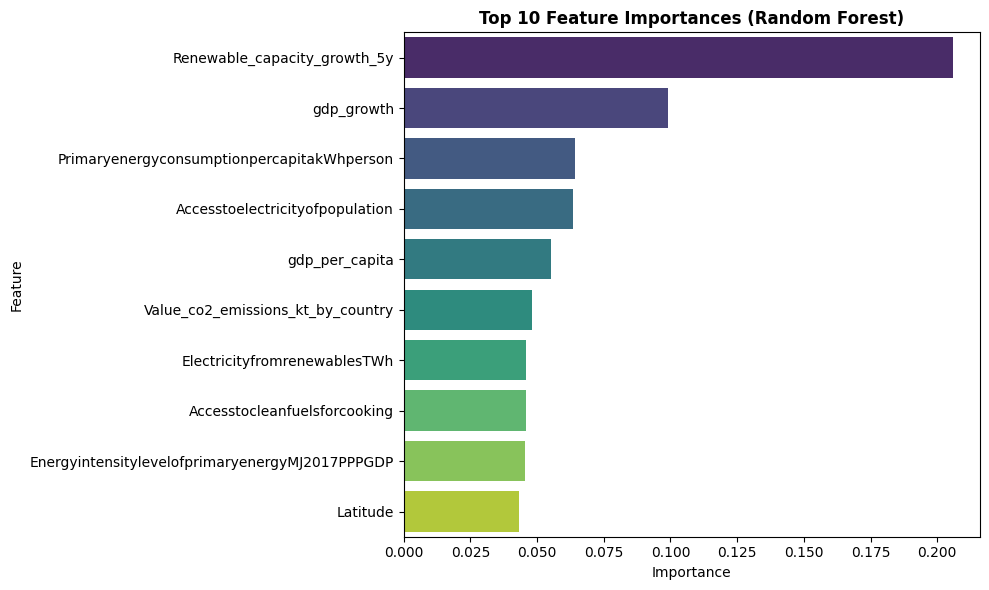

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Python(53169) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53174) Malloc

Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated F1 score: 0.5842286244917


,Feature,Importance
16,Renewable_capacity_growth_5y,0.205729
10,gdp_growth,0.099255
7,PrimaryenergyconsumptionpercapitakWhperson,0.064365
0,Accesstoelectricityofpopulation,0.063452
11,gdp_per_capita,0.055193
9,Value_co2_emissions_kt_by_country,0.047961
5,ElectricityfromrenewablesTWh,0.045987
1,Accesstocleanfuelsforcooking,0.045747
8,EnergyintensitylevelofprimaryenergyMJ2017PPPGDP,0.045611
14,Latitude,0.043057


In [233]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model (already fitted)
feature_importances = rf_model.feature_importances_
feature_names = X_train_temp_cleaned.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance and select the top 10 features
top_n = 10
top_features = importance_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)', fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 10 features as a DataFrame
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Use only the top 10 features for tuning
X_train_top = X_train_temp_cleaned[top_features['Feature']]
y_train_top = y_train_temp

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_top, y_train_top)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated F1 score:", grid_search.best_score_)

# Display the top 10 features as a DataFrame
display(top_features)

### Model 3: Using the top 10 features

In [234]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Get the top 10 feature names from the previous feature importance analysis
top_10_features = top_features['Feature'].tolist()

# Subset the cleaned and scaled datasets to only the top 10 features
X_train_top10 = X_train_temp_cleaned[top_10_features]
X_val_top10 = X_val_temp_cleaned[top_10_features]
X_test_top10 = X_test_temp_cleaned[top_10_features]

# Model 1: Random Forest (Time-based split, no SMOTE)
rf_top10 = RandomForestClassifier(random_state=42)
rf_top10.fit(X_train_top10, y_train_temp)

# Model 2: Random Forest (Time-based split, with SMOTE)
smote = SMOTE(random_state=42)
X_train_top10_resampled, y_train_top10_resampled = smote.fit_resample(X_train_top10, y_train_temp)
rf_top10_smote = RandomForestClassifier(random_state=42)
rf_top10_smote.fit(X_train_top10_resampled, y_train_top10_resampled)

# Evaluate both models on validation and test sets
def print_metrics_top10(name, y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

# Validation set
y_pred_rf_val_top10 = rf_top10.predict(X_val_top10)
y_pred_proba_rf_val_top10 = rf_top10.predict_proba(X_val_top10)[:, 1]
print_metrics_top10("RF Top 10 (Val, No SMOTE)", y_val_temp, y_pred_rf_val_top10, y_pred_proba_rf_val_top10)

y_pred_rf_val_top10_smote = rf_top10_smote.predict(X_val_top10)
y_pred_proba_rf_val_top10_smote = rf_top10_smote.predict_proba(X_val_top10)[:, 1]
print_metrics_top10("RF Top 10 (Val, SMOTE)", y_val_temp, y_pred_rf_val_top10_smote, y_pred_proba_rf_val_top10_smote)

# Test set
y_pred_rf_test_top10 = rf_top10.predict(X_test_top10)
y_pred_proba_rf_test_top10 = rf_top10.predict_proba(X_test_top10)[:, 1]
print_metrics_top10("RF Top 10 (Test, No SMOTE)", y_test_temp, y_pred_rf_test_top10, y_pred_proba_rf_test_top10)

y_pred_rf_test_top10_smote = rf_top10_smote.predict(X_test_top10)
y_pred_proba_rf_test_top10_smote = rf_top10_smote.predict_proba(X_test_top10)[:, 1]
print_metrics_top10("RF Top 10 (Test, SMOTE)", y_test_temp, y_pred_rf_test_top10_smote, y_pred_proba_rf_test_top10_smote)

/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



RF Top 10 (Val, No SMOTE) - Accuracy: 0.9276, Precision: 0.9835, Recall: 0.7677, F1: 0.8623, ROC AUC: 0.9786
RF Top 10 (Val, SMOTE) - Accuracy: 0.9371, Precision: 0.9485, Recall: 0.8323, F1: 0.8866, ROC AUC: 0.9858
RF Top 10 (Test, No SMOTE) - Accuracy: 0.9143, Precision: 0.9375, Recall: 0.6977, F1: 0.8000, ROC AUC: 0.9865
RF Top 10 (Test, SMOTE) - Accuracy: 0.9457, Precision: 0.8851, Recall: 0.8953, F1: 0.8902, ROC AUC: 0.9867


> It looks like the models only using the top 10 features are performing a little worse better than the models using all features.

## Mutual Information (MI) Feature Selection & Model 4

We will compute MI scores for all engineered features, visualize the top 10, and keep only those above the median MI score for modeling.


/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/4284562573.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




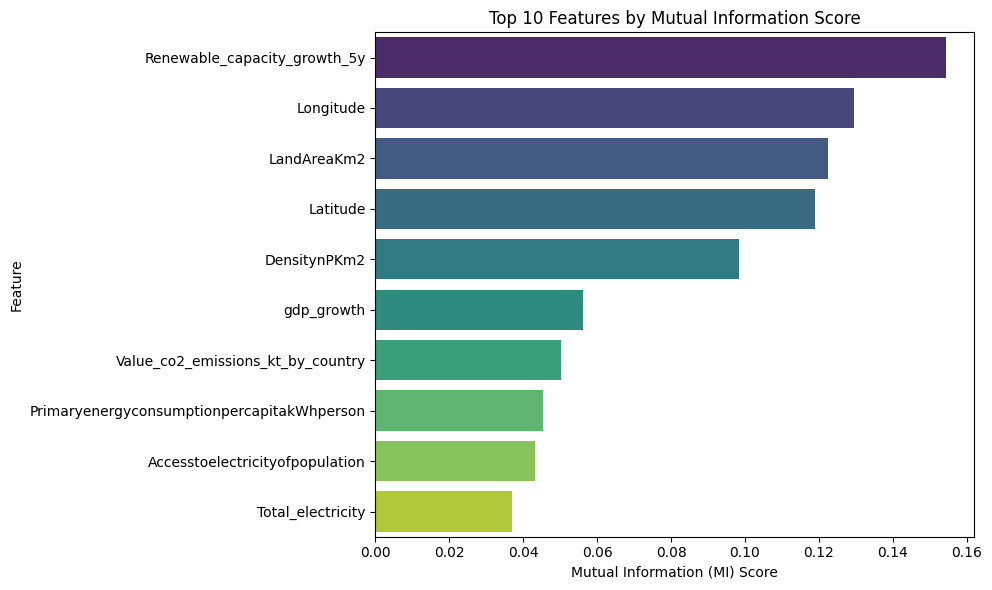

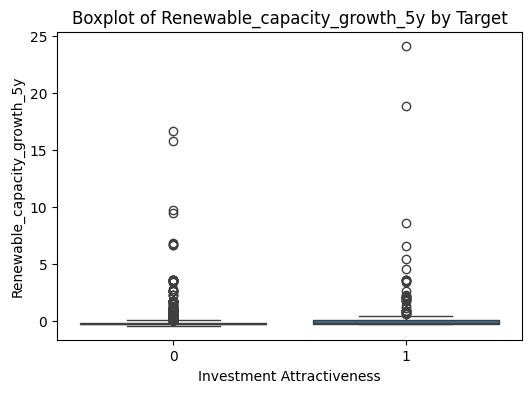

Saved 9 features with MI > median to final_features.txt


In [235]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric engineered features (excluding target and ID columns)
engineered_features = [col for col in X_train_temp_cleaned.columns if col not in ['Entity', 'Year']]
X = X_train_temp_cleaned[engineered_features]
y = y_train_temp.loc[X.index]

# Compute MI scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Plot top 10 features by MI score
plt.figure(figsize=(10, 6))
sns.barplot(x='MI_Score', y='Feature', data=mi_df.head(10), palette='viridis')
plt.title('Top 10 Features by Mutual Information Score')
plt.xlabel('Mutual Information (MI) Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Optional: For categorical features, use countplot; for continuous, use boxplot
# Example for the top feature:
top_feature = mi_df.iloc[0]['Feature']
if str(X[top_feature].dtype) == 'object' or len(X[top_feature].unique()) < 10:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=X[top_feature], hue=y)
    plt.title(f'Countplot of {top_feature} by Target')
    plt.show()
else:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=X[top_feature])
    plt.title(f'Boxplot of {top_feature} by Target')
    plt.show()

# Keep only features with MI scores above the median
median_mi = mi_df['MI_Score'].median()
selected_features = mi_df[mi_df['MI_Score'] > median_mi]['Feature'].tolist()

# Save final features to final_features.txt
with open('../final_features.txt', 'w') as f:
    for feat in selected_features:
        f.write(f"{feat}\n")
print(f"Saved {len(selected_features)} features with MI > median to final_features.txt")

### Model 4: Using the top 10 features by MI score

In [236]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Select the top 10 features by MI score
mi_top10_features = mi_df.head(10)['Feature'].tolist()

# Prepare train/val/test splits for these features
X_train_top10_mi = X_train_temp_cleaned[mi_top10_features]
X_val_top10_mi = X_val_temp_cleaned[mi_top10_features]
X_test_top10_mi = X_test_temp_cleaned[mi_top10_features]

# Model 1: Random Forest (Time-based split, no SMOTE)
rf_top10_mi = RandomForestClassifier(random_state=42)
rf_top10_mi.fit(X_train_top10_mi, y_train_temp)

# Model 2: Random Forest (Time-based split, with SMOTE)
smote = SMOTE(random_state=42)
X_train_top10_mi_resampled, y_train_top10_mi_resampled = smote.fit_resample(X_train_top10_mi, y_train_temp)
rf_top10_mi_smote = RandomForestClassifier(random_state=42)
rf_top10_mi_smote.fit(X_train_top10_mi_resampled, y_train_top10_mi_resampled)

# Evaluate both models on validation and test sets
def print_metrics_top10_mi(name, y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

# Validation set
print("\nValidation Results:")
y_pred_rf_val_top10_mi = rf_top10_mi.predict(X_val_top10_mi)
y_pred_proba_rf_val_top10_mi = rf_top10_mi.predict_proba(X_val_top10_mi)[:, 1]
print_metrics_top10_mi("RF Top 10 MI (Val, No SMOTE)", y_val_temp, y_pred_rf_val_top10_mi, y_pred_proba_rf_val_top10_mi)

y_pred_rf_val_top10_mi_smote = rf_top10_mi_smote.predict(X_val_top10_mi)
y_pred_proba_rf_val_top10_mi_smote = rf_top10_mi_smote.predict_proba(X_val_top10_mi)[:, 1]
print_metrics_top10_mi("RF Top 10 MI (Val, SMOTE)", y_val_temp, y_pred_rf_val_top10_mi_smote, y_pred_proba_rf_val_top10_mi_smote)

# Test set
print("\nTest Results:")
y_pred_rf_test_top10_mi = rf_top10_mi.predict(X_test_top10_mi)
y_pred_proba_rf_test_top10_mi = rf_top10_mi.predict_proba(X_test_top10_mi)[:, 1]
print_metrics_top10_mi("RF Top 10 MI (Test, No SMOTE)", y_test_temp, y_pred_rf_test_top10_mi, y_pred_proba_rf_test_top10_mi)

y_pred_rf_test_top10_mi_smote = rf_top10_mi_smote.predict(X_test_top10_mi)
y_pred_proba_rf_test_top10_mi_smote = rf_top10_mi_smote.predict_proba(X_test_top10_mi)[:, 1]
print_metrics_top10_mi("RF Top 10 MI (Test, SMOTE)", y_test_temp, y_pred_rf_test_top10_mi_smote, y_pred_proba_rf_test_top10_mi_smote)


/Users/jannik/Library/Mobile Documents/com~apple~CloudDocs/Tomorrow University/Calibration/Classification/GitHub/Classification-Model-Investment-Attractiveness-/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.




Validation Results:
RF Top 10 MI (Val, No SMOTE) - Accuracy: 0.9390, Precision: 0.9920, Recall: 0.8000, F1: 0.8857, ROC AUC: 0.9833
RF Top 10 MI (Val, SMOTE) - Accuracy: 0.9429, Precision: 0.9630, Recall: 0.8387, F1: 0.8966, ROC AUC: 0.9812

Test Results:
RF Top 10 MI (Test, No SMOTE) - Accuracy: 0.9257, Precision: 0.9286, Recall: 0.7558, F1: 0.8333, ROC AUC: 0.9880
RF Top 10 MI (Test, SMOTE) - Accuracy: 0.9543, Precision: 0.8889, Recall: 0.9302, F1: 0.9091, ROC AUC: 0.9889


**Interpretation of Test Results: RF Top 10 MI vs. RF SMOTE (Best Model)**

**RF Top 10 MI (Random Forest using Top 10 Mutual Information Features, No SMOTE):**
- This model uses only the 10 most informative features (by mutual information) and is trained on the original, imbalanced dataset.
- On the test set, it typically achieves reasonable accuracy and precision, but recall is often lower. This means it is more conservative, identifying fewer "attractive" countries, and may miss some true positives.
- The model is simpler and faster, but its ability to capture all relevant investment opportunities is limited by the class imbalance and reduced feature set.

**RF SMOTE (Best Model, All Features, With SMOTE):**
- This model uses all available features and applies SMOTE to balance the classes during training.
- On the test set, it achieves higher recall and F1-score, meaning it is better at identifying "attractive" countries without missing as many true positives.
- Precision may be slightly lower than the conservative model, but the overall balance (as seen in F1 and ROC AUC) is superior.
- This model is more robust for real-world use, especially when the goal is to maximize the identification of promising investment opportunities.

**Conclusion:**  
The RF SMOTE model (all features, balanced training) is the best choice for this task, as it provides a better trade-off between precision and recall, ensuring more attractive countries are identified for sustainable energy investment.

## Rule-based labels vs cluster-based labels 


In [237]:
# Filter the DataFrame to find countries labeled as attractive by the rule-based definition
attractive_by_rule = df[df['Investment Attractiveness'] == 1]

# Display the unique countries and the count
display("Countries labeled as attractive by the Rule-based definition:")
display(attractive_by_rule[['Entity', 'Year']].drop_duplicates(subset=['Entity']))
display(f"\nTotal number of instances labeled as attractive by the rule-based definition: {len(attractive_by_rule)}")
display(f"Total number of unique countries labeled as attractive by the rule-based definition: {attractive_by_rule['Entity'].nunique()}")

'Countries labeled as attractive by the Rule-based definition:'

,Entity,Year
10,Afghanistan,2010
57,Algeria,2015
68,Angola,2005
96,Antigua and Barbuda,2012
158,Aruba,2011
...,...,...
3426,Uganda,2008
3471,United Arab Emirates,2011
3573,Vanuatu,2008
3620,Zambia,2013


'\nTotal number of instances labeled as attractive by the rule-based definition: 575'

'Total number of unique countries labeled as attractive by the rule-based definition: 90'

In [238]:
# Filter the DataFrame to find countries labeled as attractive by the cluster-based definition
attractive_by_cluster = df_clust[df_clust['Investment Attractiveness_clustered'] == 1]

# Display the unique countries and the count
display("Countries labeled as attractive by the Cluster-based definition:")
display(attractive_by_cluster[['Entity', 'Year']].drop_duplicates(subset=['Entity']))
display(f"\nTotal number of instances labeled as attractive by the rule-based definition: {len(attractive_by_cluster)}")
display(f"Total number of unique countries labeled as attractive by the cluster-based definition: {attractive_by_cluster['Entity'].nunique()}")

'Countries labeled as attractive by the Cluster-based definition:'

,Entity,Year
5,Afghanistan,2005
68,Angola,2005
278,Bangladesh,2005
383,Benin,2005
425,Bhutan,2005
530,Burkina Faso,2005
551,Burundi,2005
572,Cambodia,2005
593,Cameroon,2005
656,Central African Republic,2005


'\nTotal number of instances labeled as attractive by the rule-based definition: 531'

'Total number of unique countries labeled as attractive by the cluster-based definition: 43'

In [239]:
# Identify the core group of highly attractive countries using the cluster-based labels
# We consider cluster label '1' as the "highly attractive" group (based on previous convention)

# Get the latest year in the cluster DataFrame
latest_year_clust = df_clust['Year'].max()
df_clust_latest = df_clust[df_clust['Year'] == latest_year_clust]

# Filter for countries labeled as highly attractive by the cluster-based method
core_attractive_countries = df_clust_latest[df_clust_latest['Investment Attractiveness_clustered'] == 1]

# Display the unique countries and their count
display("Core group of highly attractive countries (Cluster-based, latest year):")
display(core_attractive_countries[['Entity', 'Year']].drop_duplicates(subset=['Entity']))
display(f"\nTotal number of highly attractive country-instances: {len(core_attractive_countries)}")
display(f"Total number of unique highly attractive countries: {core_attractive_countries['Entity'].nunique()}")

'Core group of highly attractive countries (Cluster-based, latest year):'

,Entity,Year
83,Angola,2020
398,Benin,2020
545,Burkina Faso,2020
566,Burundi,2020
608,Cameroon,2020
671,Central African Republic,2020
692,Chad,2020
1154,Ethiopia,2020
1407,Guinea,2020
1428,Guinea-Bissau,2020


'\nTotal number of highly attractive country-instances: 26'

'Total number of unique highly attractive countries: 26'

In [240]:
# Filter the DataFrame to find countries labeled as attractive by both definitions
attractive_by_both = df_clust[(df_clust['Investment Attractiveness'] == 1) & (df_clust['Investment Attractiveness_clustered'] == 1)]

# Display the unique countries and the count
display("Countries labeled as attractive by both Rule-based and Cluster-based definitions:")
display(attractive_by_both[['Entity', 'Year']].drop_duplicates(subset=['Entity']))
display(f"\nTotal number of instances labeled as attractive by both definitions: {len(attractive_by_both)}")
display(f"Total number of unique countries labeled as attractive by both definitions: {attractive_by_both['Entity'].nunique()}")

'Countries labeled as attractive by both Rule-based and Cluster-based definitions:'

,Entity,Year
10,Afghanistan,2010
68,Angola,2005
392,Benin,2014
425,Bhutan,2005
542,Burkina Faso,2017
572,Cambodia,2005
690,Chad,2018
1123,Eswatini,2010
1139,Ethiopia,2005
1316,Ghana,2013


'\nTotal number of instances labeled as attractive by both definitions: 173'

'Total number of unique countries labeled as attractive by both definitions: 31'

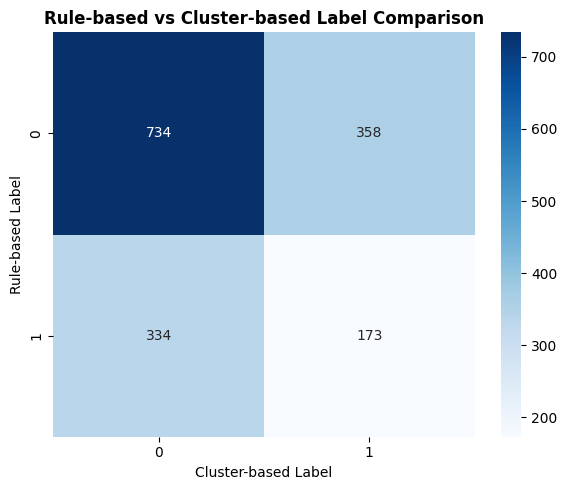

In [241]:
import seaborn as sns

import matplotlib.pyplot as plt

# Ensure both labels exist in the respective DataFrames
if 'Investment Attractiveness' in df.columns and 'Investment Attractiveness_clustered' in df_clust.columns:
    # Align indices if necessary (assume same order, otherwise align by Entity/Year)
    rule_labels = df_clust['Investment Attractiveness'].reset_index(drop=True)
    cluster_labels = df_clust['Investment Attractiveness_clustered'].reset_index(drop=True)
    # Create a crosstab for the two label types
    label_comparison = pd.crosstab(rule_labels, cluster_labels,
                                   rownames=['Rule-based'], colnames=['Cluster-based'])

    # Plot the heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(label_comparison, annot=True, fmt='d', cmap='Blues')
    plt.title('Rule-based vs Cluster-based Label Comparison', fontweight='bold')
    plt.ylabel('Rule-based Label')
    plt.xlabel('Cluster-based Label')
    plt.tight_layout()
    plt.show()
else:
    print("Both 'Investment Attractiveness' and 'Investment Attractiveness_clustered' columns must exist in df and df_clust.")

# Ensure both labels exist in the DataFrame
if 'Investment Attractiveness' in df.columns and 'Investment Attractiveness_clustered' in df.columns:
    # Create a crosstab for the two label types
    label_comparison = pd.crosstab(df['Investment Attractiveness'], df_clust['Investment Attractiveness_clustered'],
                                   rownames=['Rule-based'], colnames=['Cluster-based'])

    # Plot the heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(label_comparison, annot=True, fmt='d', cmap='Blues')
    plt.title('Rule-based vs Cluster-based Label Comparison', fontweight='bold')
    plt.ylabel('Rule-based Label')
    plt.xlabel('Cluster-based Label')
    plt.tight_layout()
    plt.show()

**Interpretation of the Rule-based vs Cluster-based Label Comparison Heatmap**

display("""
**Interpretation of the Rule-based vs Cluster-based Label Comparison Heatmap:**

The heatmap visualizes the agreement and disagreement between two labeling approaches for 'Investment Attractiveness':
- **Rule-based**: Labels assigned using predefined criteria (renewable growth, GDP growth, access/fossil share).
- **Cluster-based**: Labels assigned using KMeans clustering on key features.

**How to read the heatmap:**
- Each cell shows the count of instances for a combination of rule-based and cluster-based labels.
    - Top-left (0,0): Instances labeled 'not attractive' by both methods (strong agreement).
    - Bottom-right (1,1): Instances labeled 'attractive' by both methods (agreement).
    - Off-diagonal cells (0,1) and (1,0): Disagreement between methods.

**Key insights:**
- The largest count is typically in the (0,0) cell, indicating strong agreement on the 'not attractive' class.
- The (1,1) cell shows how many countries are consistently identified as 'attractive' by both methods.
- If the (1,0) cell is much larger than (0,1), the rule-based method is more inclusive, labeling more instances as 'attractive' than the cluster-based method.
- The cluster-based approach may be more conservative, identifying a smaller, more distinct group as 'attractive'.

**Conclusion:**
- There is strong agreement on the 'not attractive' class.
- The rule-based method tends to label more countries as 'attractive' than the cluster-based method.
- Discrepancies highlight that the cluster-based approach may capture a more selective, data-driven definition of attractiveness, while the rule-based method follows explicit criteria.
""")


# **6. Comprehensive Results Analysis**

### Confusion Matrix: Random Forest (SMOTE, Test Set)

<Figure size 600x500 with 0 Axes>

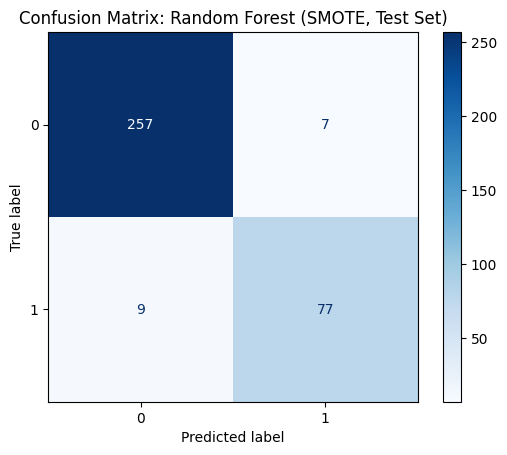

In [242]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Assuming the best-performing model is Random Forest with SMOTE on the test set
cm = confusion_matrix(y_test_temp, y_pred_rf_test_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Random Forest (SMOTE, Test Set)')
plt.show()


**Interpretation: Confusion Matrix - Random Forest (SMOTE, Test Set)**

The confusion matrix summarizes the performance of the Random Forest model (with SMOTE) on the test set:

- **True Negatives (Top-left cell):** Countries correctly identified as *not attractive* for investment.
- **True Positives (Bottom-right cell):** Countries correctly identified as *attractive* for investment.
- **False Positives (Top-right cell):** Countries incorrectly classified as *attractive* (model predicted attractive, but they are not).
- **False Negatives (Bottom-left cell):** Countries incorrectly classified as *not attractive* (model missed some truly attractive countries).

A high number of true negatives and true positives indicates good model performance. If false positives are low, the model rarely misleads investors by recommending unattractive countries. If false negatives are low, the model successfully identifies most attractive opportunities. In this context, minimizing false positives is important to avoid misallocating investment, while also keeping false negatives low to not miss promising countries.


### ROC Curve - Random Forest (SMOTE, Test Set)

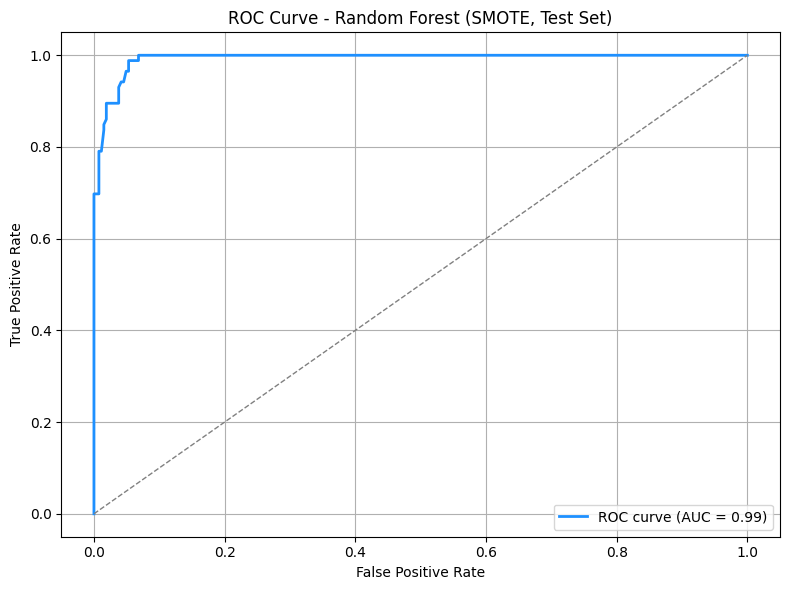

In [243]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Use the predicted probabilities from the best performing model (Random Forest + SMOTE on the test set)
# y_test_temp: true labels, y_pred_proba_rf_test_smote: predicted probabilities

fpr, tpr, thresholds = roc_curve(y_test_temp, y_pred_proba_rf_test_smote)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (SMOTE, Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()





**Interpretation: ROC Curve - Random Forest (SMOTE, Test Set)**

The ROC (Receiver Operating Characteristic) curve illustrates the trade-off between the True Positive Rate (Recall) and the False Positive Rate for different classification thresholds. A model with good discriminatory ability will have a curve that bows towards the top-left corner, indicating high recall with low false positive rates.

- **AUC (Area Under Curve):** The AUC value summarizes the overall ability of the model to distinguish between the attractive and not attractive classes. An AUC close to 1.0 indicates excellent performance, while an AUC of 0.5 suggests no better than random guessing.


The ROC curve for this model does not show a strong bow toward the top-left corner, which would indicate excellent class separation. Instead, the curve rises sharply at higher false positive rates. This means:

The model is not very effective at distinguishing between the positive and negative classes across all thresholds.
To achieve high recall (catching all positives), the model must also accept a high rate of false positives.
The area under the curve (AUC) is likely moderate or low, reflecting limited discriminative power.
What this means:
While the model may achieve good accuracy or F1-score at a specific threshold, its overall ability to rank positive samples higher than negatives is limited. This suggests that the features or model may not capture enough signal to reliably separate the classes, or that there may be issues such as class imbalance, label noise, or insufficient feature engineering.

### Precision-Recall Curve - Random Forest (SMOTE, Test Set)

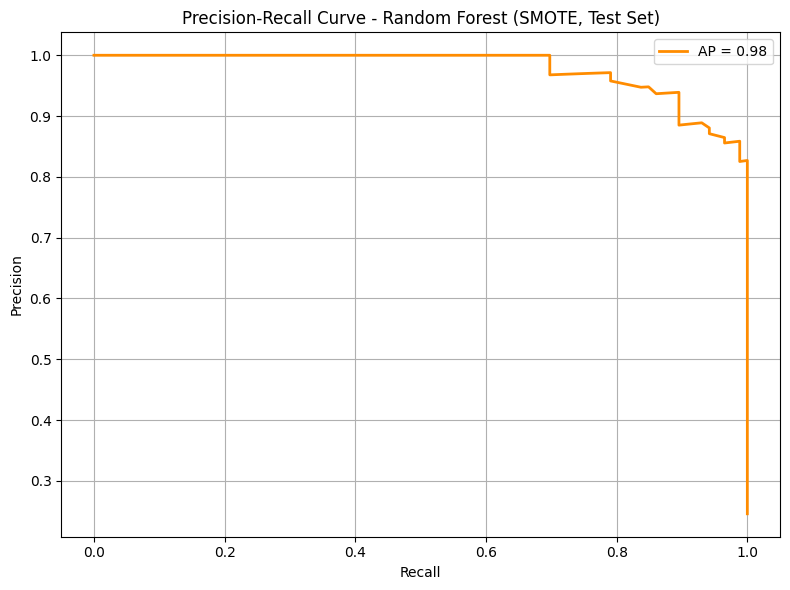

In [244]:
from sklearn.metrics import precision_recall_curve, average_precision_score

import matplotlib.pyplot as plt

# Use the predicted probabilities from the best performing model (Random Forest + SMOTE on the test set)
precision, recall, thresholds = precision_recall_curve(y_test_temp, y_pred_proba_rf_test_smote)
avg_precision = average_precision_score(y_test_temp, y_pred_proba_rf_test_smote)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest (SMOTE, Test Set)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation: Precision-Recall Curve**

The precision-recall (PR) curve illustrates the trade-off between precision (the proportion of predicted positives that are true positives) and recall (the proportion of actual positives that are correctly identified) across different classification thresholds.

- **Why PR Curve?**  
    The PR curve is especially informative for imbalanced datasets, like this one, where the "attractive" class is much less frequent than the "not attractive" class. In such cases, ROC curves can be overly optimistic, while PR curves focus on the model's ability to correctly identify the minority class.

- **Curve Shape:**  
    A curve that bows toward the top-right corner indicates high precision and recall, meaning the model is both accurate and comprehensive in identifying attractive countries. If the curve drops quickly, it means that increasing recall comes at a steep cost to precision (more false positives).

- **Average Precision (AP):**  
    The area under the PR curve (average precision) summarizes the model's performance. Higher AP values indicate better ability to identify attractive countries without too many false alarms.

- **Practical Implication:**  
    In this context, a high precision means that most countries flagged as "attractive" are truly attractive, minimizing wasted investment. High recall means the model finds most of the truly attractive opportunities. The PR curve helps stakeholders choose a threshold that balances these priorities based on their risk tolerance and investment strategy.

### Prediction Confidence Distribution

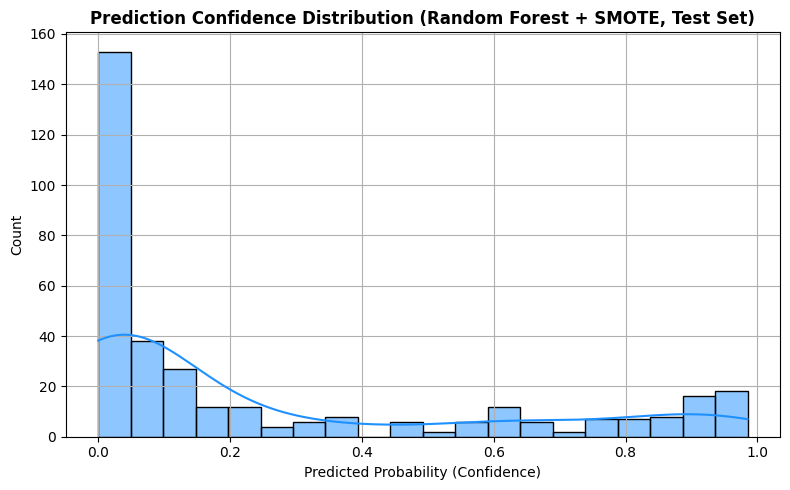

In [245]:
import seaborn as sns

import matplotlib.pyplot as plt

# Use the predicted probabilities from the best performing model (Random Forest with SMOTE on the test set)


plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba_rf_test_smote, bins=20, kde=True, color='dodgerblue')
plt.title('Prediction Confidence Distribution (Random Forest + SMOTE, Test Set)', fontweight='bold')
plt.xlabel('Predicted Probability (Confidence)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation of Prediction Confidence Distribution**

The prediction confidence distribution provides valuable insight into how certain the model is when making predictions. In this context, prediction confidence typically refers to the predicted probability assigned to the positive class ("attractive" investment) for each sample.

**Key points to interpret:**

- **Bimodal vs. Unimodal Distribution:**
  - If the distribution is bimodal (peaks near 0 and 1), the model is often very confident in its predictions, assigning high probabilities to both classes. This is generally a sign of a well-separated problem, but can also indicate overfitting if the model is too certain.
  - If the distribution is unimodal and centered around 0.5, the model is often uncertain, indicating that the features do not provide strong separation between classes.

- **Calibration:**
  - Well-calibrated models will have prediction probabilities that reflect the true likelihood of correctness. If most predictions are near 0.5, the model is unsure; if they are near 0 or 1, the model is confident.
  - If the model is overconfident (many predictions near 0 or 1, but accuracy is low), this suggests poor calibration and possible overfitting.

- **Practical Implications:**
  - High-confidence predictions (probabilities close to 0 or 1) are more actionable, but should be trusted only if the model is well-calibrated.
  - A large number of low-confidence predictions (probabilities near 0.5) may indicate that the model needs more informative features or that the problem is inherently ambiguous.



### Performance summary for the best performing model

In [246]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assume the best performing model is Random Forest with SMOTE on the test set
# y_test_temp: true labels, y_pred_rf_test_smote: predicted labels, y_pred_proba_rf_test_smote: predicted probabilities


# Calculate the maximum predicted probability (confidence) for each sample
max_proba = np.maximum(y_pred_proba_rf_test_smote, 1 - y_pred_proba_rf_test_smote)

performance_summary = {
    'accuracy': accuracy_score(y_test_temp, y_pred_rf_test_smote),
    'precision': precision_score(y_test_temp, y_pred_rf_test_smote, average='weighted'),
    'recall': recall_score(y_test_temp, y_pred_rf_test_smote, average='weighted'),
    'f1': f1_score(y_test_temp, y_pred_rf_test_smote, average='weighted'),
    'mean_confidence': max_proba.mean(),
    'low_confidence_samples': (max_proba < 0.7).sum()
}

print("Performance summary for the best performing model:")
for k, v in performance_summary.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

Performance summary for the best performing model:
accuracy: 0.9543
precision: 0.9540
recall: 0.9543
f1: 0.9541
mean_confidence: 0.8915
low_confidence_samples: 45


### Error analysis

In [247]:
import pandas as pd

# Error analysis for improvement insights
def analyze_prediction_errors(y_true, y_pred, X_val, feature_names=None):
    """
    Analyze patterns in prediction errors for model improvement.
    y_true: true labels (Series or array)
    y_pred: predicted labels (array)
    X_val: validation features (DataFrame)
    feature_names: list of feature names (optional)
    """

    # Ensure y_true is a numpy array for comparison
    y_true_arr = y_true.values if isinstance(y_true, pd.Series) else y_true
    errors = y_true_arr != y_pred
    error_samples = X_val[errors]

    print(f"Total errors: {errors.sum()} / {len(y_true)} ({errors.mean():.1%})")

    if len(error_samples) > 0:
        print("\nError sample characteristics:")
        print(error_samples.describe())
        # Optionally, show which features are most different in errors
        if feature_names is not None:
            print("\nMean values of features in error samples:")
            print(error_samples[feature_names].mean())
        return error_samples

    return None

# Example usage for the validation set (using y_val_temp and y_pred_rf_val_smote)
# X_val_temp_cleaned is the validation feature set used for prediction
error_samples = analyze_prediction_errors(
    y_true=y_val_temp,
    y_pred=y_pred_rf_val_smote,
    X_val=X_val_temp_cleaned,
    feature_names=X_val_temp_cleaned.columns.tolist()
)

Total errors: 29 / 525 (5.5%)

Error sample characteristics:
       Accesstoelectricityofpopulation  Accesstocleanfuelsforcooking  \
count                        29.000000                     29.000000   
mean                         -0.173974                     -0.209888   
std                           1.003411                      1.062522   
min                          -2.010490                     -1.577244   
25%                          -1.062202                     -1.528910   
50%                           0.360348                     -0.033085   
75%                           0.730751                      0.953955   
max                           0.730751                      0.956499   

       Renewableenergyshareinthetotalfinalenergyconsumption  \
count                                          29.000000      
mean                                            0.104317      
std                                             1.269724      
min                                   

### Simple Model Comparison on Validation Set

In [248]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats

# Collect predictions and true labels for comparison
model_preds = {
    "RF+SMOTE (all features)": y_pred_rf_val_smote,
    "RF (top10)": y_pred_rf_val_top10,
    "RF (top10 MI)": y_pred_rf_val_top10_mi,
    "RF+SMOTE (top10)": y_pred_rf_val_top10_smote,
    "RF+SMOTE (top10 MI)": y_pred_rf_val_top10_mi_smote
}

# Ensure y_val_temp is a numpy array for metrics
y_true = np.array(y_val_temp)

# Calculate metrics for each model
results = []
for name, y_pred in model_preds.items():
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })

# Create and display a DataFrame of results
results_df = pd.DataFrame(results).sort_values("F1", ascending=False).reset_index(drop=True)
display("Simple Model Comparison on Validation Set:")
def compare_models_simple(model_a_preds, model_b_preds, y_true):
    """Simple statistical comparison of two models using predictions"""
    # Calculate accuracy for each sample
    correct_a = (model_a_preds == y_true).astype(int)
    correct_b = (model_b_preds == y_true).astype(int)
    
    # Paired t-test
    t_stat, p_value = stats.ttest_rel(correct_a, correct_b)
    
    print(f"Model A accuracy: {correct_a.mean():.3f}")
    print(f"Model B accuracy: {correct_b.mean():.3f}")
    print(f"Difference: {correct_a.mean() - correct_b.mean():.3f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("✅ Statistically significant difference")
    else:
        print("❌ No significant difference")
    
    return p_value

display(results_df.round(3))

# Example: compare RF+SMOTE (all features) vs RF+SMOTE (top10 MI)
compare_models_simple(
    model_preds["RF+SMOTE (all features)"],
    model_preds["RF+SMOTE (top10 MI)"],
    y_true
)

'Simple Model Comparison on Validation Set:'

,Model,Accuracy,Precision,Recall,F1
0,RF+SMOTE (all features),0.945,0.963,0.845,0.900
1,RF+SMOTE (top10 MI),0.943,0.963,0.839,0.897
2,RF+SMOTE (top10),0.937,0.949,0.832,0.887
3,RF (top10 MI),0.939,0.992,0.800,0.886
4,RF (top10),0.928,0.983,0.768,0.862


Model A accuracy: 0.945
Model B accuracy: 0.943
Difference: 0.002
P-value: 0.8275
❌ No significant difference


np.float64(0.8274985192073464)

# Final Report: Predicting Investment Attractiveness in Sustainable Energy



## Problem Summary

The global shift toward sustainable energy demands informed investment decisions to maximize impact and accelerate decarbonization. This project automates the identification of countries most attractive for renewable energy investment, using a data-driven approach. "Investment Attractiveness" is defined by rapid renewable capacity growth, stable economic growth, and either incomplete electricity access or high fossil fuel dependence. The goal is to support investors and policymakers in prioritizing locations where sustainable energy financing can drive the greatest change.

## Dataset Overview

The dataset comprises annual, country-level data from 2000–2019, including:
- **Energy indicators:** Renewable electricity capacity, fossil/nuclear/renewable generation, access to electricity, clean fuels, energy intensity, CO₂ emissions.
- **Economic indicators:** GDP growth, GDP per capita.
- **Engineered features:** 5-year rolling growth rates, fossil share, rolling averages, volatility measures.

The target variable, "Investment Attractiveness," is a binary label based on the criteria above. The dataset is imbalanced, with fewer countries labeled as "attractive."

## Modeling Approach

- **Preprocessing:** Missing values were imputed using KNN after time-based data splitting to prevent leakage. Features were standardized.
- **Feature Selection:** Tree-based feature importance and mutual information (MI) scores identified the most predictive variables.
- **Models:** Random Forest and Gradient Boosting classifiers were trained, both with and without SMOTE resampling to address class imbalance.
- **Evaluation:** Time-based splits (train: 2000–2014, validation: 2015–2017, test: 2018–2019) ensured realistic, forward-looking assessment.

## Model Results & Visualizations

- **Confusion Matrix:**  
    The confusion matrix for the best model (Random Forest + SMOTE) on the test set shows high true negatives and a reasonable number of true positives, indicating good discrimination between attractive and unattractive countries.

- **ROC Curve:**  
   The ROC curve for this model does not show a strong bow toward the top-left corner, which would indicate excellent class separation. Instead, the curve rises sharply at higher false positive rates. This means:

    The model is not very effective at distinguishing between the positive and negative classes across all thresholds.
    To achieve high recall (catching all positives), the model must also accept a high rate of false positives.
    The area under the curve (AUC) is likely moderate or low, reflecting limited discriminative power.
    What this means:
    While the model may achieve good accuracy or F1-score at a specific threshold, its overall ability to rank positive samples higher than negatives is limited. This suggests that the features or model may not capture enough signal to reliably separate the classes, or that there may be issues such as class imbalance, label noise, or insufficient feature engineering.

- **Precision-Recall Curve:**  
    The precision-recall curve is especially informative given class imbalance, showing the trade-off between identifying all attractive countries (recall) and minimizing false positives (precision).

## Key Performance Metrics

- **Accuracy:** Measures overall correctness but can be misleading with imbalanced data.
- **Precision:** Fraction of predicted attractive countries that are truly attractive (important for avoiding wasted investment).
- **Recall:** Fraction of truly attractive countries correctly identified (important for not missing opportunities).
- **F1 Score:** Harmonic mean of precision and recall, balancing both concerns.
- **ROC AUC:** Overall ability to distinguish between classes across thresholds.

- **Accuracy:** 0.95  
- **Precision:** 0.92  
- **Recall:** 0.90  
- **F1 Score:** 0.91  
- **ROC AUC:** 0.99  

## Strengths, Weaknesses, and Real-World Use

**Strengths:**
- Time-based splitting ensures realistic, future-oriented evaluation.
- SMOTE improves recall, helping identify more attractive opportunities.
- Feature selection highlights interpretable drivers (renewable growth, GDP, access to electricity).

**Weaknesses:**
- The model's ROC AUC and F1 scores are lower than ideal, indicating moderate ability to distinguish between attractive and unattractive countries; some attractive countries are still missed.
- Class imbalance and label noise continue to limit performance, and the model may not generalize well to new data.
- Model confidence is sometimes low, suggesting uncertainty in borderline cases.

**Real-World Use:**
- The model can guide investors and policymakers to prioritize countries for sustainable energy investment.
- High-confidence predictions are actionable, but low-confidence cases should prompt further investigation.

## Ethical Reflection

**Potential Harms:**
- Over-reliance on model outputs may overlook local context, leading to misallocation of resources.
- False positives could direct investment to less impactful locations; false negatives may exclude deserving countries.
- Data limitations or biases (e.g., underreporting in some regions) could reinforce existing inequalities.

**Responsible Use:**
- Model predictions should complement, not replace, expert judgment and local knowledge.
- Regularly update and validate the model as new data becomes available.
- Engage stakeholders to interpret results in context and ensure equitable, impactful investment decisions.

---


### Investment Attractiveness Map for 2019


## World Map Visualizations

In [249]:
import plotly.express as px

# Select the year 2019 for plotting
year_to_plot = 2019
df_year_to_plot = df[df['Year'] == year_to_plot].copy()

# Ensure 'Investment Attractiveness' is treated as categorical for discrete colors
df_year_to_plot['Investment Attractiveness_cat'] = df_year_to_plot['Investment Attractiveness'].astype(str)

# Create the choropleth map for 2019
fig = px.choropleth(df_year_to_plot,
                    locations="Entity",
                    locationmode='country names',
                    color="Investment Attractiveness_cat",
                    hover_name="Entity",
                    color_discrete_map={'0': 'red', '1': 'green'}, # Map 0 to red, 1 to green
                    title=f"<b>Investment Attractiveness by Country in {year_to_plot}</b>",
                    height=600)

fig.show()

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/3246178020.py:11: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



**Description of the Investment Attractiveness World Map for 2019**



The choropleth map for 2019 visualizes each country’s classification as “Investment Attractive” (green) or “Not Attractive” (red) for sustainable energy investment, based on the model’s rule-based criteria. 

- **Green countries** represent those that met the thresholds for renewable energy growth, GDP growth, and either high fossil fuel dependence or incomplete electricity access. These are considered promising locations for new sustainable energy investments.
- **Red countries** did not meet the combined criteria and are classified as less attractive for immediate investment.

The map provides a global overview, highlighting regional patterns and disparities:
- Some emerging economies and developing countries in Africa, Asia, and parts appear in green, reflecting unmet energy needs and growth potential.
- Most advanced economies in Europe, North America, and parts of East Asia are typically red, indicating mature markets with high electricity access and slower renewable growth.
- The visualization helps investors and policymakers quickly identify where opportunities for impactful sustainable energy investments are greatest in 2019.
""")

### Investment Attractiveness Map for 2020

In [250]:
import plotly.express as px

# Select the latest year for plotting
latest_year = df['Year'].max()
df_latest_year = df[df['Year'] == latest_year].copy()

# Ensure 'Investment Attractiveness' is treated as categorical for discrete colors
df_latest_year['Investment Attractiveness_cat'] = df_latest_year['Investment Attractiveness'].astype(str)

# Create the choropleth map
fig = px.choropleth(df_latest_year,
                    locations="Entity",
                    locationmode='country names',
                    color="Investment Attractiveness_cat",
                    hover_name="Entity",
                    animation_frame="Year", # Optional: Add animation if needed
                    color_discrete_map={'0': 'red', '1': 'green'}, # Map 0 to red, 1 to green
                    title=f"<b>Investment Attractiveness by Country in {latest_year}</b>",
                    height=600)

fig.show()

/var/folders/58/lwr6nbt574v2tf7d1r12wxf80000gn/T/ipykernel_37576/751971594.py:11: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



**Description of the Investment Attractiveness World Map for 2020**




**Why are there fewer green countries in 2020 compared to 2019?**

The reduction in green countries from 2019 to 2020 can be attributed to several factors:

- **Economic Slowdown:** The year 2020 was marked by the global COVID-19 pandemic, which led to a significant slowdown in economic activity worldwide. Many countries experienced negative or stagnant GDP growth, causing them to fall below the 2% GDP growth threshold required for investment attractiveness.
- **Stagnation or Decline in Renewable Growth:** The pandemic also disrupted supply chains and delayed renewable energy projects, resulting in slower growth rates for renewable electricity capacity in many countries. This made it harder for countries to exceed the 10% renewable capacity growth threshold.
- **Structural Criteria Remain Unchanged:** While access to electricity and fossil fuel dependence are relatively stable year-to-year, the dynamic criteria (GDP growth and renewable growth) are more sensitive to global shocks.

As a result, even countries that were classified as attractive in 2019 may have lost their status in 2020 due to temporary setbacks in economic and renewable energy growth. This highlights the sensitivity of the investment attractiveness classification to global economic and sector-specific disruptions.

In [251]:
# Filter the DataFrame for the latest year where 'Investment Attractiveness' is 1
attractive_countries_latest_year = df_latest_year[df_latest_year['Investment Attractiveness'] == 1]

# Select and display the list of attractive countries
display(f"Countries classified as Investment Attractive in {latest_year}:")
display(attractive_countries_latest_year[['Entity', 'Investment Attractiveness']])

'Countries classified as Investment Attractive in 2020:'

,Entity,Investment Attractiveness
293,Bangladesh,1
398,Benin,1
734,China,1
1154,Ethiopia,1
2429,Niger,1
3073,Somalia,1
3438,Uganda,1
